### Amazon product data - ELECTRONICS Dataset
http://jmcauley.ucsd.edu/data/amazon/links.html

#### Abstract: 
Dataset is a big collection of users who purchased electronics products in amazon and corresponding product ratings with detailed reviews.

#### Goal:
Build a recommendation engine with goal is to recommend new products to each user based on his/her habits.

#### Data Set Information:

5-core (9.9gb) - subset of the data in which all users and items have at least 5 reviews (41.13 million reviews)

Finally, it removes duplicates more aggressively, removing duplicates even if they are written by different users. This accounts for users with multiple accounts or plagiarized reviews. Such duplicates account for less than 1 percent of reviews, though this dataset is probably preferable for sentiment analysis type tasks

#### Attribute Information:

1. reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B
2. asin - ID of the product, e.g. 0000013714
3. reviewerName - name of the reviewer
4. helpful - helpfulness rating of the review, e.g. 2/3
5. reviewText - text of the review
6. overall - rating of the product
7. summary - summary of the review
8. unixReviewTime - time of the review (unix time)
9. reviewTime - time of the review (raw)

### APPROACH/STEPs TAKEN:

#### Basic Data Analysis & EDA
1. Import all the needed packages
2. Load 5-core dataset that has user, review and rating information. Also, load metadata dataset that also has production information like title and description of product. It is not present in 5-core dataset, and hence metadata would give additional information on product itself
3. EDA of top users who always contributed to reviews, top items that has been consistently rated and study/assess for any obvious patterns

#### Recommendation Model Implementations

4. Build Popularity based recommendation engine
5. Build Content based recommendation engine - Linear, Cosine and Sigmoid similarity based
6. Build Memory based collaborative recommender - User/User similarity
7. Build Memory based collaborative recommender - User/Item similarity
8. Build Model based recommender - Matrix Factorization (SVD)

#### Evaluation of Recommendation Model

9. Evaluate the recommender with RMSE - Find the optimal value of 'K' with minimal RMSE

#### Conclusion

10. Apply the recommendation engine on different users - Observe the recommendation outcome
11. Final verdict - Technical and functional summmary

In [1]:
#################################
#importing the needed packages###
#################################
import numpy as np
import pandas as pd
import pandas as pd
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import warnings; warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split

In [2]:
########################################################################
#### Load the 5 core dataset with user, review and ratings present #####
########################################################################
train_df = pd.read_json("reviews_Electronics_5.json", lines=True)

######################################################################################################################################
### data reference and credits: ######################################################################################################
#### R. He, J. McAuley. Modeling the visual evolution of fashion trends with one-class collaborative filtering. WWW, 2016 ############
#### J. McAuley, C. Targett, J. Shi, A. van den Hengel. Image-based recommendations on styles and substitutes. SIGIR, 2015 ###########
##### this was shared purely for research purpose 
http://jmcauley.ucsd.edu/data/amazon/links.html
####################################################################################
######################################################################################################################################

In [3]:
#####################################################
#### random inspection of the user review dataset ###
#####################################################
train_df.head(10)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5,Gotta have GPS!,1370131200,"06 2, 2013"
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1,Very Disappointed,1290643200,"11 25, 2010"
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3,1st impression,1283990400,"09 9, 2010"
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2,"Great grafics, POOR GPS",1290556800,"11 24, 2010"
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1,"Major issues, only excuses for support",1317254400,"09 29, 2011"
5,A2JXAZZI9PHK9Z,0594451647,"Billy G. Noland ""Bill Noland""","[3, 3]",I am using this with a Nook HD+. It works as d...,5,HDMI Nook adapter cable,1388707200,"01 3, 2014"
6,A2P5U7BDKKT7FW,0594451647,Christian,"[0, 0]",The cable is very wobbly and sometimes disconn...,2,Cheap proprietary scam,1398556800,"04 27, 2014"
7,AAZ084UMH8VZ2,0594451647,"D. L. Brown ""A Knower Of Good Things""","[0, 0]",This adaptor is real easy to setup and use rig...,5,A Perfdect Nook HD+ hook up,1399161600,"05 4, 2014"
8,AEZ3CR6BKIROJ,0594451647,Mark Dietter,"[0, 0]",This adapter easily connects my Nook HD 7&#34;...,4,A nice easy to use accessory.,1405036800,"07 11, 2014"
9,A3BY5KCNQZXV5U,0594451647,Matenai,"[3, 3]",This product really works great but I found th...,5,This works great but read the details...,1390176000,"01 20, 2014"


In [4]:
###################################################################
##### Also load the meta data of amazon electronic products #######
###################################################################
meta_df = pd.read_json("amazon_electronics.json", lines=True)

In [5]:
### Random inspection of the product's meta data - like category, title, price etc. ####
meta_df.head()

,asin,imUrl,description,categories,title,price,salesRank,related,brand
0,0132793040,http://ecx.images-amazon.com/images/I/31JIPhp%...,The Kelby Training DVD Mastering Blend Modes i...,"[[Electronics, Computers & Accessories, Cables...",Kelby Training DVD: Mastering Blend Modes in A...,NaN,NaN,NaN,NaN
1,0136919820,http://ecx.images-amazon.com/images/I/51A6Xuxn...,PrefaceThis book is intended for use in the co...,[[Books]],Electronics,52.77,{'Books': 208464},"{'also_bought': ['0470383305', '0195158334', '...",NaN
2,0321732944,http://ecx.images-amazon.com/images/I/31uogm6Y...,NaN,"[[Electronics, Computers & Accessories, Cables...",Kelby Training DVD: Adobe Photoshop CS5 Crash ...,NaN,NaN,NaN,NaN
3,0321732960,http://ecx.images-amazon.com/images/I/31IlLImC...,NaN,[[Computers]],Kelby Training DVD: The Adobe Photoshop CS5 7-...,34.38,{'Electronics': 197743},"{'buy_after_viewing': ['0321501926', '03217035...",NaN
4,0321735722,http://ecx.images-amazon.com/images/I/31TvjSNb...,If you're already a Photoshop user and want a ...,[[Computers]],Kelby Training DVD: Adobe Photoshop CS5 Power ...,38.95,{'Electronics': 206374},"{'also_bought': ['0321703561'], 'bought_togeth...",NaN


In [6]:
#### Retaining ony needed features from metadata ####
meta_df.drop(['salesRank', 'imUrl', 'related', 'price'], axis=1, inplace=True)
meta_df.head()

,asin,description,categories,title,brand
0,0132793040,The Kelby Training DVD Mastering Blend Modes i...,"[[Electronics, Computers & Accessories, Cables...",Kelby Training DVD: Mastering Blend Modes in A...,NaN
1,0136919820,PrefaceThis book is intended for use in the co...,[[Books]],Electronics,NaN
2,0321732944,NaN,"[[Electronics, Computers & Accessories, Cables...",Kelby Training DVD: Adobe Photoshop CS5 Crash ...,NaN
3,0321732960,NaN,[[Computers]],Kelby Training DVD: The Adobe Photoshop CS5 7-...,NaN
4,0321735722,If you're already a Photoshop user and want a ...,[[Computers]],Kelby Training DVD: Adobe Photoshop CS5 Power ...,NaN


In [7]:
#####################################################
#### Inspecting the metadata datatype categories ####
#####################################################
meta_df.dropna(subset=['categories'], inplace=True)
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 517086 entries, 0 to 517163
Data columns (total 5 columns):
asin           517086 non-null object
description    473598 non-null object
categories     517086 non-null object
title          509850 non-null object
brand          146277 non-null object
dtypes: object(5)
memory usage: 23.7+ MB


In [8]:
####################################################################################
### Since metadata has list of list, we need this small utility to flatten it ######
######## so that we can merge this metadata with 5core dataset for our training ####
####################################################################################
from iteration_utilities import deepflatten
def flat_categories(category_list_lists):
    
    return list(deepflatten(category_list_lists, depth=1))

In [9]:
#### Convert electronics list of list to list data type #####
meta_df['product_category'] = meta_df['categories'].apply(lambda x: flat_categories(x))
meta_df.drop(['categories'], axis=1, inplace=True)
meta_df.head()

,asin,description,title,brand,product_category
0,0132793040,The Kelby Training DVD Mastering Blend Modes i...,Kelby Training DVD: Mastering Blend Modes in A...,NaN,"[Electronics, Computers & Accessories, Cables ..."
1,0136919820,PrefaceThis book is intended for use in the co...,Electronics,NaN,[Books]
2,0321732944,NaN,Kelby Training DVD: Adobe Photoshop CS5 Crash ...,NaN,"[Electronics, Computers & Accessories, Cables ..."
3,0321732960,NaN,Kelby Training DVD: The Adobe Photoshop CS5 7-...,NaN,[Computers]
4,0321735722,If you're already a Photoshop user and want a ...,Kelby Training DVD: Adobe Photoshop CS5 Power ...,NaN,[Computers]


In [10]:
############################################################################
####### expand the product category - ONE CATEGORY per row in metadata #####
############## and create a new dataframe ONLY with electronics category ###
############################################################################
product_category_df = meta_df.product_category.apply(pd.Series).merge(meta_df, left_index = True, right_index = True) \
.drop(["product_category"], axis = 1).melt(id_vars = ['asin', 'title', 'brand','description'], value_name = "product_category") \
    .drop("variable", axis = 1) \
    .query('product_category == "Electronics"')

In [11]:
product_category_df.head(20).T

,0,2,7,8,9,10,12,13,14,15,16,17,18,19,20,21,22,23,24,25
asin,0132793040,0321732944,0439886341,0511189877,0528881469,0558835155,0594012015,0594017580,0594450209,0594287995,0594549558,0594514681,0594514789,0594549507,0594478162,0594451647,0594450705,0594017343,0594033896,0594477670
title,Kelby Training DVD: Mastering Blend Modes in A...,Kelby Training DVD: Adobe Photoshop CS5 Crash ...,Digital Organizer and Messenger,CLIKR-5 Time Warner Cable Remote Control UR5U-...,Rand McNally 528881469 7-inch Intelliroute TND...,Polaroid Pbm2200 PC / Gaming Stereo Headphones...,Barnes &amp; Noble NOOK Power Kit in Carbon BN...,Jonathan Adler Punctuation Cover in Black,Barnes &amp; Noble 7&quot; Lautner Chocolate N...,Kate Spade Rain or Shine Magazine Cover for No...,Barnes &amp; Noble Jonathan Adler Book Reader ...,Hd Groovy Stand In Blue- Nook,Nook Vara Stylus: Pink,Groovy Protective Stand Cover: Custom Designed...,Official Nook Audio Ie250 Earphones,Barnes &amp; Noble HDTV Adapter Kit for NOOK H...,Nook Vara Stylus 2-in-1,Barnes Noble Nook Simple Touch Reader BRNV300+...,Nook Color Clear Screen Protector Kit 2-Pack,Barnes &amp; Noble NOOK Color &amp; Tablet Ant...
brand,NaN,NaN,NaN,NaN,NaN,NaN,Barnes &amp; Noble,NaN,NaN,NaN,NaN,NaN,NaN,Barnes &amp; Noble,NaN,NaN,NaN,NaN,NaN,NaN
description,The Kelby Training DVD Mastering Blend Modes i...,NaN,Digital Organizer and Messenger,The CLIKR-5 UR5U-8780L remote control is desig...,"Like its award-winning predecessor, the Intell...",Use these high quality headphones for internet...,The Barnes &amp;amp; Noble BNADPN31 Power Kit ...,"NOOK cover, designed by Jonathon Adler.\nFits ...",Keep your tablet safe with this Barnes &amp; N...,NaN,NaN,Nook HD+ Barnes and Noble Groovy Stand BLUE fo...,NaN,"Slim, smart, and lightweight, this ingenious c...",Barnes and noble official nook earphones.,HDTV Adapter Kit for NOOK HD and NOOK HD+\nThi...,IT'S BEST PRODUCTS THAT A LOT PEOPLE LOVE IT.,NaN,The Barnes &amp;amp; Noble H15201-LTR-1 Clear ...,Nook Color Tablet Anti--Glare Screen Film Kit ...
product_category,Electronics,Electronics,Electronics,Electronics,Electronics,Electronics,Electronics,Electronics,Electronics,Electronics,Electronics,Electronics,Electronics,Electronics,Electronics,Electronics,Electronics,Electronics,Electronics,Electronics


In [12]:
######################################
##### Signs of POSSIBLE DUPLICATES ###
######################################
product_category_df.query('asin == "B003JH7XQ0"')

,asin,title,brand,description,product_category
198114,B003JH7XQ0,NANUK Padded Divider for 925 Case,Nanuk,NaN,Electronics
2266458,B003JH7XQ0,NANUK Padded Divider for 925 Case,Nanuk,NaN,Electronics
4334802,B003JH7XQ0,NANUK Padded Divider for 925 Case,Nanuk,NaN,Electronics
6403146,B003JH7XQ0,NANUK Padded Divider for 925 Case,Nanuk,NaN,Electronics
8471490,B003JH7XQ0,NANUK Padded Divider for 925 Case,Nanuk,NaN,Electronics
10539834,B003JH7XQ0,NANUK Padded Divider for 925 Case,Nanuk,NaN,Electronics
12608178,B003JH7XQ0,NANUK Padded Divider for 925 Case,Nanuk,NaN,Electronics
14676522,B003JH7XQ0,NANUK Padded Divider for 925 Case,Nanuk,NaN,Electronics
16744866,B003JH7XQ0,NANUK Padded Divider for 925 Case,Nanuk,NaN,Electronics
18813210,B003JH7XQ0,NANUK Padded Divider for 925 Case,Nanuk,NaN,Electronics


In [13]:
product_category_df.shape

(502540, 5)

In [14]:
################################################################################
#### Remove the duplicates, with total of close to 500,000 items in metadata ###
################################################################################
product_category_df.drop_duplicates(inplace=True)
product_category_df.shape

(499912, 5)

In [15]:
##################################################################################################
###### Merge our user-review data with item metadata joining by ASIN which is item ID(unique)#####
##################################################################################################
ratings_meta_df = pd.merge(train_df, product_category_df, on='asin')
ratings_meta_df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,title,brand,description,product_category
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5,Gotta have GPS!,1370131200,"06 2, 2013",Rand McNally 528881469 7-inch Intelliroute TND...,NaN,"Like its award-winning predecessor, the Intell...",Electronics
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1,Very Disappointed,1290643200,"11 25, 2010",Rand McNally 528881469 7-inch Intelliroute TND...,NaN,"Like its award-winning predecessor, the Intell...",Electronics
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3,1st impression,1283990400,"09 9, 2010",Rand McNally 528881469 7-inch Intelliroute TND...,NaN,"Like its award-winning predecessor, the Intell...",Electronics
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2,"Great grafics, POOR GPS",1290556800,"11 24, 2010",Rand McNally 528881469 7-inch Intelliroute TND...,NaN,"Like its award-winning predecessor, the Intell...",Electronics
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1,"Major issues, only excuses for support",1317254400,"09 29, 2011",Rand McNally 528881469 7-inch Intelliroute TND...,NaN,"Like its award-winning predecessor, the Intell...",Electronics


In [16]:
################################################################################
##### Since we joined the datasets with UNIQUE item ID #########################
####### we still have 1,689,188 user reviews merged with item description ######
############## and all item features are added as extra features ###############
################### with total of 13 features in training set ##################
################################################################################
product_category_df.shape, train_df.shape, ratings_meta_df.shape

((499912, 5), (1689188, 9), (1689188, 13))

In [17]:
ratings_meta_df.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
reviewerID,AO94DHGC771SJ,AMO214LNFCEI4,A3N7T0DY83Y4IG,A1H8PY3QHMQQA0,A24EV6RXELQZ63,A2JXAZZI9PHK9Z,A2P5U7BDKKT7FW,AAZ084UMH8VZ2,AEZ3CR6BKIROJ,A3BY5KCNQZXV5U,A7S2B0I67WNWB,A3HICVLF4PFFMN,ANSKSPEEAKY7S,A2QBZA4S1ROX9Q,ANY6JUFM0GH8U
asin,0528881469,0528881469,0528881469,0528881469,0528881469,0594451647,0594451647,0594451647,0594451647,0594451647,0594481813,0594481813,0594481813,0594481813,0594481813
reviewerName,amazdnu,Amazon Customer,C. A. Freeman,"Dave M. Shaw ""mack dave""",Wayne Smith,"Billy G. Noland ""Bill Noland""",Christian,"D. L. Brown ""A Knower Of Good Things""",Mark Dietter,Matenai,AllyMG,Amazon Customer,Gena,Jake,J. Clement
helpful,"[0, 0]","[12, 15]","[43, 45]","[9, 10]","[0, 0]","[3, 3]","[0, 0]","[0, 0]","[0, 0]","[3, 3]","[2, 2]","[0, 0]","[1, 1]","[0, 1]","[2, 2]"
reviewText,We got this GPS for my husband who is an (OTR)...,"I'm a professional OTR truck driver, and I bou...","Well, what can I say. I've had this unit in m...","Not going to write a long review, even thought...",I've had mine for a year and here's what we go...,I am using this with a Nook HD+. It works as d...,The cable is very wobbly and sometimes disconn...,This adaptor is real easy to setup and use rig...,This adapter easily connects my Nook HD 7&#34;...,This product really works great but I found th...,This item is just as was described in the orig...,bought for a spare for my 9&#34; Nook HD and i...,My son crewed my HD charger cord so I needed a...,"This is a good beefy 2 amp charger, but it cov...",I lost my B&N original cable. I looked around...
overall,5,1,3,2,1,5,2,5,4,5,4,5,5,3,5
summary,Gotta have GPS!,Very Disappointed,1st impression,"Great grafics, POOR GPS","Major issues, only excuses for support",HDMI Nook adapter cable,Cheap proprietary scam,A Perfdect Nook HD+ hook up,A nice easy to use accessory.,This works great but read the details...,As expected,great fit,Works Great,It Works,Great replacement for original power cable
unixReviewTime,1370131200,1290643200,1283990400,1290556800,1317254400,1388707200,1398556800,1399161600,1405036800,1390176000,1397606400,1399248000,1372032000,1369440000,1394323200
reviewTime,"06 2, 2013","11 25, 2010","09 9, 2010","11 24, 2010","09 29, 2011","01 3, 2014","04 27, 2014","05 4, 2014","07 11, 2014","01 20, 2014","04 16, 2014","05 5, 2014","06 24, 2013","05 25, 2013","03 9, 2014"
title,Rand McNally 528881469 7-inch Intelliroute TND...,Rand McNally 528881469 7-inch Intelliroute TND...,Rand McNally 528881469 7-inch Intelliroute TND...,Rand McNally 528881469 7-inch Intelliroute TND...,Rand McNally 528881469 7-inch Intelliroute TND...,Barnes &amp; Noble HDTV Adapter Kit for NOOK H...,Barnes &amp; Noble HDTV Adapter Kit for NOOK H...,Barnes &amp; Noble HDTV Adapter Kit for NOOK H...,Barnes &amp; Noble HDTV Adapter Kit for NOOK H...,Barnes &amp; Noble HDTV Adapter Kit for NOOK H...,Barnes &amp; Noble OV/HB-ADP Universal Power Kit,Barnes &amp; Noble OV/HB-ADP Universal Power Kit,Barnes &amp; Noble OV/HB-ADP Universal Power Kit,Barnes &amp; Noble OV/HB-ADP Universal Power Kit,Barnes &amp; Noble OV/HB-ADP Universal Power Kit


In [18]:
############################################
#### Inspect for NULL value in dataset #####
############################################
NULL = np.nan
ratings_meta_df.query('product_category == @NULL')

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,title,brand,description,product_category


In [19]:
##################################################################
###### extract new feature - YEAR from timestamp #################
#### To assess for seasonal trends in item ratings ###############
##################################################################
ratings_meta_df['year'] = ratings_meta_df['unixReviewTime'].apply(lambda x: pd.Timestamp(x, unit='s').year)
ratings_meta_df.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
reviewerID,AO94DHGC771SJ,AMO214LNFCEI4,A3N7T0DY83Y4IG,A1H8PY3QHMQQA0,A24EV6RXELQZ63,A2JXAZZI9PHK9Z,A2P5U7BDKKT7FW,AAZ084UMH8VZ2,AEZ3CR6BKIROJ,A3BY5KCNQZXV5U,A7S2B0I67WNWB,A3HICVLF4PFFMN,ANSKSPEEAKY7S,A2QBZA4S1ROX9Q,ANY6JUFM0GH8U
asin,0528881469,0528881469,0528881469,0528881469,0528881469,0594451647,0594451647,0594451647,0594451647,0594451647,0594481813,0594481813,0594481813,0594481813,0594481813
reviewerName,amazdnu,Amazon Customer,C. A. Freeman,"Dave M. Shaw ""mack dave""",Wayne Smith,"Billy G. Noland ""Bill Noland""",Christian,"D. L. Brown ""A Knower Of Good Things""",Mark Dietter,Matenai,AllyMG,Amazon Customer,Gena,Jake,J. Clement
helpful,"[0, 0]","[12, 15]","[43, 45]","[9, 10]","[0, 0]","[3, 3]","[0, 0]","[0, 0]","[0, 0]","[3, 3]","[2, 2]","[0, 0]","[1, 1]","[0, 1]","[2, 2]"
reviewText,We got this GPS for my husband who is an (OTR)...,"I'm a professional OTR truck driver, and I bou...","Well, what can I say. I've had this unit in m...","Not going to write a long review, even thought...",I've had mine for a year and here's what we go...,I am using this with a Nook HD+. It works as d...,The cable is very wobbly and sometimes disconn...,This adaptor is real easy to setup and use rig...,This adapter easily connects my Nook HD 7&#34;...,This product really works great but I found th...,This item is just as was described in the orig...,bought for a spare for my 9&#34; Nook HD and i...,My son crewed my HD charger cord so I needed a...,"This is a good beefy 2 amp charger, but it cov...",I lost my B&N original cable. I looked around...
overall,5,1,3,2,1,5,2,5,4,5,4,5,5,3,5
summary,Gotta have GPS!,Very Disappointed,1st impression,"Great grafics, POOR GPS","Major issues, only excuses for support",HDMI Nook adapter cable,Cheap proprietary scam,A Perfdect Nook HD+ hook up,A nice easy to use accessory.,This works great but read the details...,As expected,great fit,Works Great,It Works,Great replacement for original power cable
unixReviewTime,1370131200,1290643200,1283990400,1290556800,1317254400,1388707200,1398556800,1399161600,1405036800,1390176000,1397606400,1399248000,1372032000,1369440000,1394323200
reviewTime,"06 2, 2013","11 25, 2010","09 9, 2010","11 24, 2010","09 29, 2011","01 3, 2014","04 27, 2014","05 4, 2014","07 11, 2014","01 20, 2014","04 16, 2014","05 5, 2014","06 24, 2013","05 25, 2013","03 9, 2014"
title,Rand McNally 528881469 7-inch Intelliroute TND...,Rand McNally 528881469 7-inch Intelliroute TND...,Rand McNally 528881469 7-inch Intelliroute TND...,Rand McNally 528881469 7-inch Intelliroute TND...,Rand McNally 528881469 7-inch Intelliroute TND...,Barnes &amp; Noble HDTV Adapter Kit for NOOK H...,Barnes &amp; Noble HDTV Adapter Kit for NOOK H...,Barnes &amp; Noble HDTV Adapter Kit for NOOK H...,Barnes &amp; Noble HDTV Adapter Kit for NOOK H...,Barnes &amp; Noble HDTV Adapter Kit for NOOK H...,Barnes &amp; Noble OV/HB-ADP Universal Power Kit,Barnes &amp; Noble OV/HB-ADP Universal Power Kit,Barnes &amp; Noble OV/HB-ADP Universal Power Kit,Barnes &amp; Noble OV/HB-ADP Universal Power Kit,Barnes &amp; Noble OV/HB-ADP Universal Power Kit


In [20]:
###############################################################################################
###### Observing the top reviewers/users who has contributed to more reviews in dataset #######
###############################################################################################
ratings_meta_df.groupby(['reviewerID', 'reviewerName']).count().sort_values(by='asin', ascending=False).head(10)['overall']

reviewerID      reviewerName                  
ADLVFFE4VBT8    A. Dent "Aragorn"                 427
A3OXHLG6DIBRW8  C. Hill "CFH"                     403
A6FIAB28IS79    Samuel Chell                      366
A680RUE1FDO8B   Jerry Saperstein                  352
A5JLAU2ARJ0BO   Gadgester "No Time, No Money"     351
A1ODOGXEYECQQ8  Nuknuk                            330
A36K2N527TXXJN  Dr. Bojan Tunguz                  281
ARBKYIVNYWK3C   RST10                             267
A25C2M3QF9G7OQ  Comdet                            260
AWPODHOB4GFWL   Martin A Hogan "Marty From SF"    260
Name: overall, dtype: int64

In [21]:
################################################################################################
##### Dataset also has brand new users or rare users who has purchased/reviewed ONLY ONCE ######
################################################################################################
ratings_meta_df.groupby(['reviewerID', 'reviewerName']).count().sort_values(by='asin', ascending=True).head(5)['overall']

reviewerID      reviewerName       
A1XKKK96F6MDOI  A Customer             1
A102NRRPWBWBCC  Amazon Customer        1
A2AHRH18M8GHQD  Amazon Customer        1
A1GCAAK08A5CSY  A Customer             1
A1I3YCZ58CJ01E  AK_Lydia "AK_MOMMY"    1
Name: overall, dtype: int64

In [22]:
##########################################################################################################
##### Like above for users, we will observe for TOP FREQUENTLY purchased/reviewed Item in dataset ########
##########################################################################################################
ratings_meta_df.groupby(['asin']).count().sort_values(by='reviewerID', ascending=False).head(10)['overall']

asin
B007WTAJTO    4915
B003ES5ZUU    4143
B00DR0PDNE    3798
B0019EHU8G    3435
B002WE6D44    2813
B003ELYQGG    2652
B0002L5R78    2599
B009SYZ8OC    2542
B00BGGDVOO    2104
B002V88HFE    2082
Name: overall, dtype: int64

In [23]:
################################################################################################
###### Dataset contain items that have been reviewed ATLEAST 5 times - which is good ###########
############# as we do not want item to have ONLY ONE REVIEW that does not reflect anything ####
################################################################################################
ratings_meta_df.groupby(['asin']).count().sort_values(by='reviewerID', ascending=True).head(5)['overall']

asin
0528881469    5
B002W3RU6K    5
B002W4XNQ0    5
B002W7VTMW    5
B002WC7RKU    5
Name: overall, dtype: int64

In [24]:
#define a plot function of bivariate analysis - Scatter plot

def plot_scatter (graph_df, x_axis, y_axis, target=None):
    
    sns.FacetGrid(graph_df, hue=target, size=5) \
    .map(plt.scatter, x_axis, y_axis) \
    .add_legend()
    
    return;

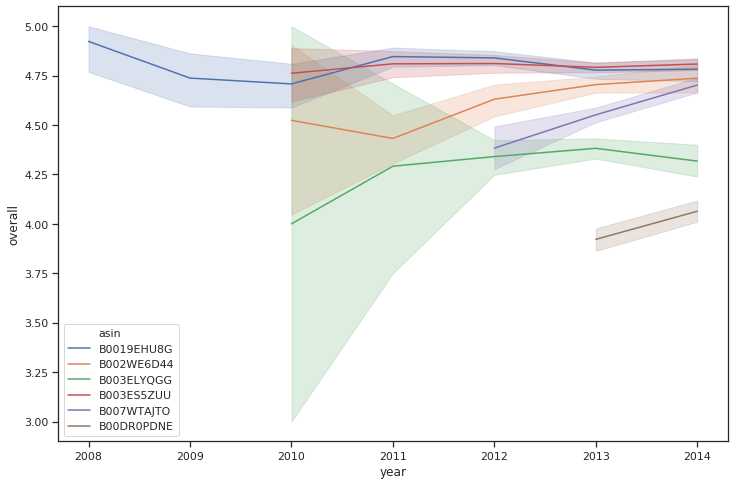

In [25]:
#######################################################
##### Studying the pattern for top reviewed items #####
#######################################################
ax = sns.lineplot(x="year", y="overall", hue='asin',
             data=ratings_meta_df.query('asin == "B007WTAJTO" or asin == "B003ES5ZUU" or asin == "B00DR0PDNE" \
             or asin == "B0019EHU8G" or asin == "B002WE6D44" or asin == "B003ELYQGG"'))

fig = plt.gcf()
fig.set_size_inches( 12, 8)
plt.show()

#### Interesting that, top reviewed items do have a trend of maintaining a reasonable/consistent high rating close to 4 and above.

In [26]:
############################################
###### Details of top reviewed items #######
############################################
ratings_meta_df.query('asin == "B007WTAJTO" or asin == "B003ES5ZUU" or asin == "B00DR0PDNE" \
             or asin == "B0019EHU8G" or asin == "B002WE6D44" or asin == "B003ELYQGG"')[['asin', 'title']].drop_duplicates()

,asin,title
415353,B0019EHU8G,Mediabridge ULTRA Series HDMI Cable (6 Feet) -...
676383,B002WE6D44,Transcend 8 GB Class 10 SDHC Flash Memory Card...
760251,B003ELYQGG,"Panasonic RPHJE120D In-Ear Headphone, Orange"
765009,B003ES5ZUU,AmazonBasics High-Speed HDMI Cable - 15 Feet (...
1336614,B007WTAJTO,SanDisk Ultra 64GB MicroSDXC Class 10 UHS Memo...
1621580,B00DR0PDNE,Google Chromecast HDMI Streaming Media Player


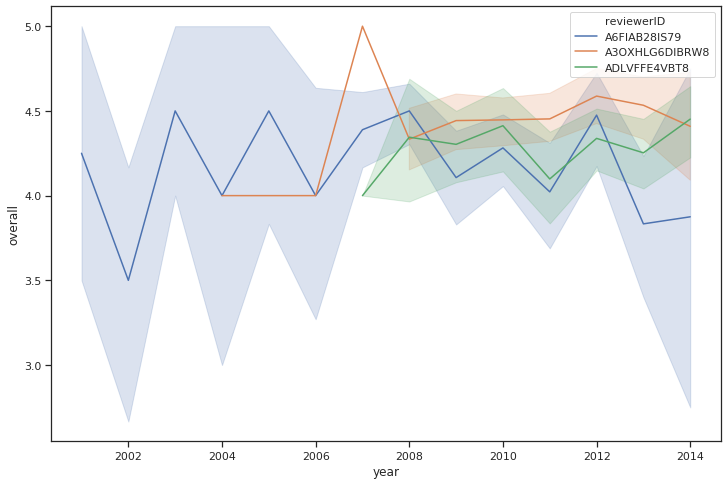

In [27]:
#############################################################
#### Studying the similar patterns for top active users #####
#############################################################
ax = sns.lineplot(x="year", y="overall", hue='reviewerID',
             data=ratings_meta_df.query('reviewerID == "ADLVFFE4VBT8" or reviewerID == "A3OXHLG6DIBRW8" \
             or reviewerID == "A6FIAB28IS79"'))

#ax.set( xticklabels=list(np.sort(ratings_meta_df.year.unique())))
fig = plt.gcf()
fig.set_size_inches( 12, 8)
plt.show()

#### Users ADLVFFE4VBT8, A3OXHLG6DIBRW8 and A6FIAB28IS79 seem to be very positive minded reviewers, with almost close to having a very predictable pattern in item ratings for the products purchased. In particular, A6FIAB28IS79 is having periodic submission of 4 and 4.5 ratings to his/her items bought. Interesting!! Hope he is not a biased user!! 

In [28]:
######################################################################################################
#### reviewing the items purchased/reviewed by these 3 optimistic reviewers which we saw above #######
######################################################################################################
ratings_meta_df.query('reviewerID == "ADLVFFE4VBT8" or reviewerID == "A3OXHLG6DIBRW8" \
             or reviewerID == "A6FIAB28IS79"')[['reviewerID','asin', 'title']].drop_duplicates().head(10)

,reviewerID,asin,title
1294,A6FIAB28IS79,B00000J05A,RCA RC5220P DVD Player
1769,A6FIAB28IS79,B00000J1UQ,Belkin 6-Feet AC Replacement Power Cord
4262,A6FIAB28IS79,B00001P4ZH,Koss PortaPro Headphones with Case
4734,A6FIAB28IS79,B00001W0DI,Sony Studio Monitor MDR-V600 Stereo Headphone ...
5558,A6FIAB28IS79,B000023VUL,D-Link DSB-H4 4-Port USB 1.1 Hub
5607,A3OXHLG6DIBRW8,B000026D8E,Seagate ST3500320AS Barracuda 7200.11 500 GB S...
5999,ADLVFFE4VBT8,B00002NDRF,DYMO 45803 High-Performance Permanent Self-Adh...
6128,A3OXHLG6DIBRW8,B00003006E,Cisco-Linksys EZXS55W EtherFast 10/100 5-Port ...
6642,A6FIAB28IS79,B00003CWDH,Monster Cable MP AV 800 PowerCenter with Surge...
8978,A6FIAB28IS79,B00004TDN0,Handspring Visor Deluxe (Blue)


In [29]:
###########################################################################################
##### Let us also get some item details that have low ratings and try to study them #######
###########################################################################################
ratings_meta_df.query('overall < 3').head(100).asin.unique()

array(['0528881469', '0594451647', '0972683275', '1400501466',
       '1400501520', '1400501776', '1400532620', '1400532655',
       '140053271X', '1400532736', '1400599997', '1400698987',
       '1400699169', '1615527613', '3936710058', '6301977173',
       '7799813393', '8862935293', '8862936826', '9043413585'],
      dtype=object)

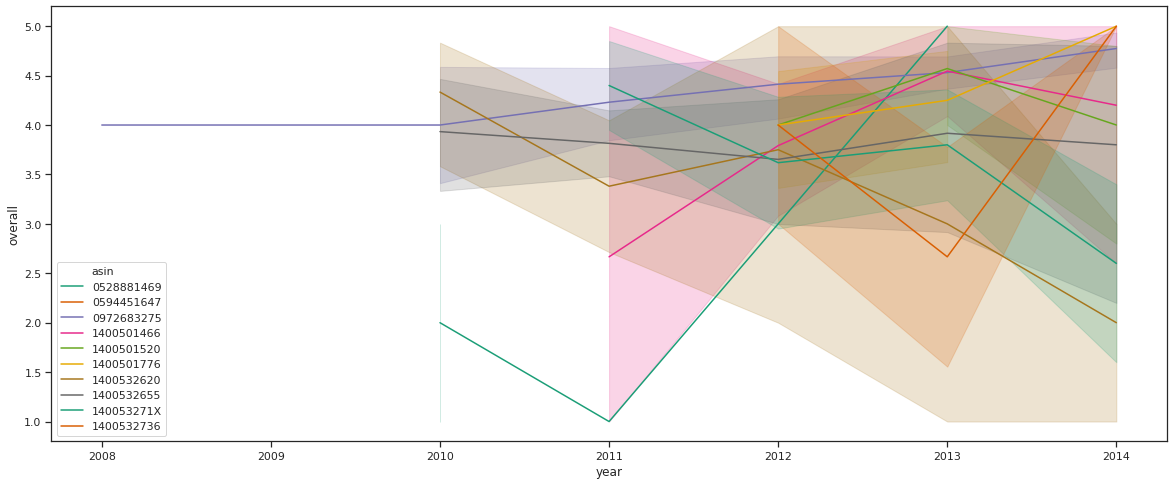

In [30]:
####################################################################
##### Let us take few low rated items and study the pattern ########
####################################################################
ax = sns.lineplot(x="year", y="overall", hue= "asin",
             data=ratings_meta_df.query("asin.isin(['0528881469', '0594451647', '0972683275', '1400501466', \
       '1400501520', '1400501776', '1400532620', '1400532655', \
       '140053271X', '1400532736'])"),
                 palette=sns.color_palette("Dark2", 10))

fig = plt.gcf()
fig.set_size_inches( 20, 8)
plt.show()

### Anything that looks interesting at immediate glance?
YES, indeed. Lot of products that have low rating long time back, seem to get improvised and get better ratings in recent years. That is indeed very ineresting and this definitely rings bell to include feature weight logics involving year of ratings like, giving less weightage to ratings from early 2000s and more weightage to ratings post 2010 etc.

In [31]:
ratings_meta_df.query("asin.isin(['0528881469', '0594451647', '0972683275', '1400501466', \
       '1400501520', '1400501776', '1400532620', '1400532655', \
       '140053271X', '1400532736'])")[['asin', 'title']].drop_duplicates()

,asin,title
0,0528881469,Rand McNally 528881469 7-inch Intelliroute TND...
5,0594451647,Barnes &amp; Noble HDTV Adapter Kit for NOOK H...
18,0972683275,VideoSecu 24&quot; Long Arm TV Wall Mount Low ...
237,1400501466,"Barnes &amp; Noble NOOK Tablet 16gb (Color, BN..."
280,1400501520,NOOK HD 7&quot; 16GB Tablet
300,1400501776,Barnes and Noble NOOK 7&quot; 8GB WiFi Tablet
320,1400532620,Barnes &amp; Noble Nook eReader - no 3G
361,1400532655,Barnes &amp; Noble Nook Color eReader
470,140053271X,Barnes &amp; Noble Nook Simple Touch eBook Rea...
541,1400532736,Nook Simple Touch eReader


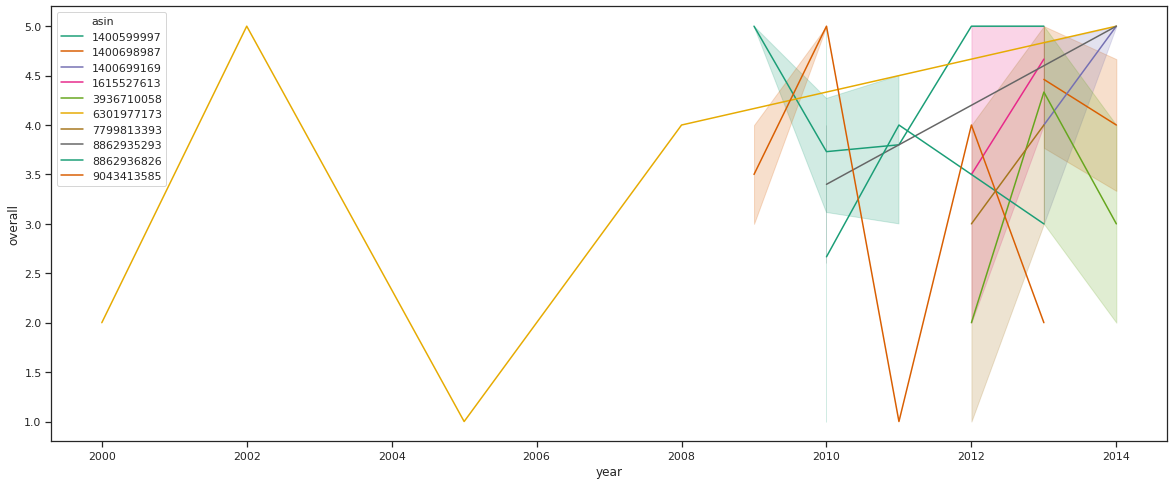

In [32]:
###############################################################################
#### Continuing to study the products that has got low ratings from users #####
###############################################################################
ax = sns.lineplot(x="year", y="overall", hue= "asin",
             data=ratings_meta_df.query("asin.isin(['1400599997', '1400698987', \
       '1400699169', '1615527613', '3936710058', '6301977173', \
       '7799813393', '8862935293', '8862936826', '9043413585'])"),
                 palette=sns.color_palette("Dark2", 10))

fig = plt.gcf()
fig.set_size_inches( 20, 8)
plt.show()

#### Item 6301977173 (Tom Sawyer) is very interesting. It started off with low ratings in 2000, then spiked to top ratings in 2002, then again to lower ratings in 2004ish, spiked again to higher ratings since 2008. This is very interesting pattern to fluctuate every 2 years in periodic pattern - definitely ringing bells of having symptoms of being influenced by some other product making users to buy this product more. (Pure intuitive guess)

In [33]:
ratings_meta_df.query("asin.isin(['1400599997', '1400698987', \
       '1400699169', '1615527613', '3936710058', '6301977173', \
       '7799813393', '8862935293', '8862936826', '9043413585'])")[['asin', 'title']].drop_duplicates()

,asin,title
554,1400599997,Barnes &amp; Noble NOOK ebook reader (WiFi + 3...
595,1400698987,Nook HD 7&quot; 8GB Tablet
623,1400699169,NOOK HD+ 9&quot; 32GB Tablet
635,1615527613,Barnes &amp; Noble BN-ADP-H01 Power Kit
666,3936710058,Spreed USB Conference Speaker Microphone
672,6301977173,Tom Sawyer [VHS]
697,7799813393,"Mygica EZgrabber2 USB 2.0 Video Capture, VHS t..."
703,8862935293,NaN
709,8862936826,Moleskine Folio Digital Tablet Cover for Apple...
721,9043413585,"Dell Axim X30 Pocket PC (624 MHz, 64MB, Wi-Fi)"


### ITEM POPULARITY BASED RECOMMENDATION

In [34]:
print("########################################################################")
print("#### Greedy Popularity based item recommendation - Overall Ratings #####")
print("########################################################################")
ratings_meta_df['item_overall_rating'] = ratings_meta_df.groupby(['asin','title']).overall.transform('sum')
ratings_meta_df[['asin','title', 'item_overall_rating']].sort_values(by='item_overall_rating', ascending=False).drop_duplicates().head(10)

########################################################################
#### Greedy Popularity based item recommendation - Overall Ratings #####
########################################################################


,asin,title,item_overall_rating
1339236,B007WTAJTO,SanDisk Ultra 64GB MicroSDXC Class 10 UHS Memo...,22548.0
765897,B003ES5ZUU,AmazonBasics High-Speed HDMI Cable - 15 Feet (...,19888.0
418413,B0019EHU8G,Mediabridge ULTRA Series HDMI Cable (6 Feet) -...,16492.0
1624303,B00DR0PDNE,Google Chromecast HDMI Streaming Media Player,15184.0
678546,B002WE6D44,Transcend 8 GB Class 10 SDHC Flash Memory Card...,13108.0
113649,B0002L5R78,DVI Gear HDMI Cable 2M 6 feet,11955.0
760305,B003ELYQGG,"Panasonic RPHJE120D In-Ear Headphone, Orange",11552.0
1493208,B009SYZ8OC,AmazonBasics Apple Certified Lightning to USB ...,11299.0
667853,B002V88HFE,eneloop SEC-CSPACER4PK C Size Spacers for use ...,9861.0
1269767,B0074BW614,"Kindle Fire HD 7&quot;, Dolby Audio, Dual-Band...",9451.0


#### Like you could see, top 10 item recommendations based on highest rated items overall
Limitations: This would be the last option for user to see in their recommendation list, as recommendations are purely based on top rated items overall & you could get ear phones recommended for HDMI cable. 
##### But hey, it sometimes works for cold start problems when there is no other information present to formulate the recommendations.


In [35]:
print("########################################################################")
print("#### Greedy Popularity based item recommendation - Average Ratings #####")
print("########################################################################")
ratings_meta_df['average_item_rating'] = ratings_meta_df.groupby(['asin','title']).overall.transform('mean')
ratings_meta_df[['asin','title', 'item_overall_rating', 'average_item_rating']].sort_values(by='average_item_rating', ascending=False).drop_duplicates().head(10)

########################################################################
#### Greedy Popularity based item recommendation - Average Ratings #####
########################################################################


,asin,title,item_overall_rating,average_item_rating
1689187,B00LGQ6HL8,Brainwavz S5 In Ear Headphones,25.0,5.0
339715,B000WJB1AW,Tripp Lite TLM825SA Safety Surge Protector 120...,30.0,5.0
1534272,B00AVLU11G,Canon Powershot G15 Lens / Filter Adapter Tube...,40.0,5.0
341340,B000WNU5YG,Monster M1000 DFO-16 M-Series 1000 Toslink Fib...,25.0,5.0
1535176,B00AWDX14C,Aurum Cables Hdmi to DVI-D Single Link (Red/Bl...,25.0,5.0
339404,B000WHXJ2C,Apple iMac 24-inch Desktop PC (2.8 GHz Intel C...,30.0,5.0
338346,B000WCT5HK,StarTech.com 3 Port 2b 1a 1394 PCI Express Fir...,35.0,5.0
332366,B000VVXUVY,Kata KT DC-433 Digital Case - Black,35.0,5.0
342703,B000WVGR9U,Hoya 52mm (HMC UV / Circular Polarizer / Warm)...,25.0,5.0
344460,B000X1R6EO,Olympus Zuiko EC-20 2x Teleconverter for Olymp...,35.0,5.0


#### Like you could see, top 10 item recommendations based on highest AVERAGE rated items

Limitations: This seems to be worse than greedy model based on highest overall ratings. i.e., if there exists an item rated top ONLY once (which is possible for brand new models), these items would top the list easily when we calculate the average rating. Most likely, items recommended in this manner is going to contain only new items.

#### This is still best way to promote newly branded items, may be it is good recommendation engine still for new arrivals category.
why not?

In [36]:
print("#############################################################################")
print("#### Greedy Popularity based item recommendation - WEIGHTED AVG Ratings #####")
print("#############################################################################")
ratings_meta_df['weighted_item_rating'] = (ratings_meta_df.item_overall_rating/len(ratings_meta_df.asin.unique()))*ratings_meta_df.average_item_rating
ratings_meta_df[['asin','title', 'item_overall_rating', 'average_item_rating', 'weighted_item_rating']].sort_values(by='weighted_item_rating', ascending=False).drop_duplicates().head(10)

#############################################################################
#### Greedy Popularity based item recommendation - WEIGHTED AVG Ratings #####
#############################################################################


,asin,title,item_overall_rating,average_item_rating,weighted_item_rating
1337859,B007WTAJTO,SanDisk Ultra 64GB MicroSDXC Class 10 UHS Memo...,22548.0,4.587589,1.641894
766596,B003ES5ZUU,AmazonBasics High-Speed HDMI Cable - 15 Feet (...,19888.0,4.800386,1.515374
415471,B0019EHU8G,Mediabridge ULTRA Series HDMI Cable (6 Feet) -...,16492.0,4.801164,1.256818
677494,B002WE6D44,Transcend 8 GB Class 10 SDHC Flash Memory Card...,13108.0,4.659794,0.969518
1623792,B00DR0PDNE,Google Chromecast HDMI Streaming Media Player,15184.0,3.997894,0.963541
113596,B0002L5R78,DVI Gear HDMI Cable 2M 6 feet,11955.0,4.599846,0.872862
761338,B003ELYQGG,"Panasonic RPHJE120D In-Ear Headphone, Orange",11552.0,4.355958,0.798718
1492345,B009SYZ8OC,AmazonBasics Apple Certified Lightning to USB ...,11299.0,4.444925,0.797181
666836,B002V88HFE,eneloop SEC-CSPACER4PK C Size Spacers for use ...,9861.0,4.736311,0.741334
257994,B000LRMS66,Garmin Portable Friction Mount - Frustration F...,9301.0,4.745408,0.700577


#### Like you could see, top 10 item recommendations based on WEIGHTED average

This is calculated based on weighted average considering the total number of items, how consistent a particular item has been rated high or low etc. This definitely adds some rationale to the greedy based popularity recommender model. I would definitely opt this for the cold start predictions for Most popular category

In [37]:
###########################################################################################
#### Let us write a small utility function to implement popularity based recommender ######
######### Inputs - user id and how many items to recommend for the given user #############
################ It would recommend the popular items that user hasn't bought #############
###########################################################################################

def recommend_popularity_item_user(reviewerID, n_items=5):
    
    user_items = list(ratings_meta_df.query('reviewerID == @reviewerID').asin.unique())
    print("############################################################")
    print("User %s has %s items. Few items include [%s]"%(reviewerID, len(user_items), user_items[0:10]))
    recommended_df = ratings_meta_df.query('~asin.isin(@user_items)').sort_values(by='weighted_item_rating', ascending=False)[['asin', 'title']].drop_duplicates().head(n_items)
    print("############################################################\n")
    print("########### PREDICTING <%s> ITEMS###########################"%(n_items))
    print("############################################################")
    return recommended_df

In [38]:
#### predictingf for user ID - AO94DHGC771SJ ####

recommend_popularity_item_user("AO94DHGC771SJ")

############################################################
User AO94DHGC771SJ has 7 items. Few items include [['0528881469', 'B0013G8PTS', 'B001TQSFXS', 'B003ZBZ64Q', 'B0075SUHKI', 'B0096TK6MI', 'B00DUKJ5CQ']]
############################################################

########### PREDICTING <5> ITEMS###########################
############################################################


,asin,title
1339812,B007WTAJTO,SanDisk Ultra 64GB MicroSDXC Class 10 UHS Memo...
765110,B003ES5ZUU,AmazonBasics High-Speed HDMI Cable - 15 Feet (...
417619,B0019EHU8G,Mediabridge ULTRA Series HDMI Cable (6 Feet) -...
677097,B002WE6D44,Transcend 8 GB Class 10 SDHC Flash Memory Card...
1624250,B00DR0PDNE,Google Chromecast HDMI Streaming Media Player


In [39]:
#### predictingf for user ID - ADLVFFE4VBT8 (who is frequently active user) ####

recommend_popularity_item_user("ADLVFFE4VBT8", 10)

##### predicting 10 items based on popularity #########

############################################################
User ADLVFFE4VBT8 has 431 items. Few items include [['B00002NDRF', 'B00005114Z', 'B00006343P', 'B000067RVL', 'B000067SGI', 'B00006B8K2', 'B00009V2W9', 'B0000VP1WQ', 'B0001IXUDK', 'B0001LTT64']]
############################################################

########### PREDICTING <10> ITEMS###########################
############################################################


,asin,title
1339978,B007WTAJTO,SanDisk Ultra 64GB MicroSDXC Class 10 UHS Memo...
677447,B002WE6D44,Transcend 8 GB Class 10 SDHC Flash Memory Card...
1621640,B00DR0PDNE,Google Chromecast HDMI Streaming Media Player
760544,B003ELYQGG,"Panasonic RPHJE120D In-Ear Headphone, Orange"
1493221,B009SYZ8OC,AmazonBasics Apple Certified Lightning to USB ...
668102,B002V88HFE,eneloop SEC-CSPACER4PK C Size Spacers for use ...
258452,B000LRMS66,Garmin Portable Friction Mount - Frustration F...
297316,B000QUUFRW,SanDisk 4GB Extreme SDHC Class 10 Memory Card
1131289,B005FYNSPK,SanDisk Cruzer Fit 4GB USB 2.0 Low-Profile Fla...
1141369,B005HMKKH4,WD My Passport 2TB Portable External USB 3.0 H...


#### Like you could see, this is fairly reasonable popularity based recommender to predict the items that user has not bought yet. This WILL ALSO WORK FOR BRAND NEW USER, as recommendation is purely based on item item popularity!!

In [40]:
#################################################################################################################
### just to make sure that there is NO NULL values in title before proceeding to content based recommendation ###
#################################################################################################################
ratings_meta_df.query('description == @NULL').head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,title,brand,description,product_category,year,item_overall_rating,average_item_rating,weighted_item_rating


### CONTENT BASED RECOMMENDATION

In [41]:
contentbased_df_user_item = ratings_meta_df[['reviewerID', 'asin', 'description', 'title']].drop_duplicates()
contentbased_df_item = contentbased_df_user_item.drop(columns=['reviewerID']).drop_duplicates()
###############################################
######### Printing User Item matrix ###########
###############################################
contentbased_df_user_item.head()

,reviewerID,asin,description,title
0,AO94DHGC771SJ,0528881469,"Like its award-winning predecessor, the Intell...",Rand McNally 528881469 7-inch Intelliroute TND...
1,AMO214LNFCEI4,0528881469,"Like its award-winning predecessor, the Intell...",Rand McNally 528881469 7-inch Intelliroute TND...
2,A3N7T0DY83Y4IG,0528881469,"Like its award-winning predecessor, the Intell...",Rand McNally 528881469 7-inch Intelliroute TND...
3,A1H8PY3QHMQQA0,0528881469,"Like its award-winning predecessor, the Intell...",Rand McNally 528881469 7-inch Intelliroute TND...
4,A24EV6RXELQZ63,0528881469,"Like its award-winning predecessor, the Intell...",Rand McNally 528881469 7-inch Intelliroute TND...


In [42]:
#############################################################################
####### Filtering item alone for calculating item based similarity ##########
#############################################################################
contentbased_df_item.head()

,asin,description,title
0,0528881469,"Like its award-winning predecessor, the Intell...",Rand McNally 528881469 7-inch Intelliroute TND...
5,0594451647,HDTV Adapter Kit for NOOK HD and NOOK HD+\nThi...,Barnes &amp; Noble HDTV Adapter Kit for NOOK H...
10,0594481813,Power up your device with this Barnes &amp; No...,Barnes &amp; Noble OV/HB-ADP Universal Power Kit
18,0972683275,The VideoSecu TV mount is a mounting solution ...,VideoSecu 24&quot; Long Arm TV Wall Mount Low ...
237,1400501466,"Enjoy your digital books, magazines and newspa...","Barnes &amp; Noble NOOK Tablet 16gb (Color, BN..."


In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfid_vector = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')
#### Just to be safe, anyway let us fill with empty string if null value is not caught #####
contentbased_df_item['description'] = contentbased_df_item['description'].fillna('')
tfidf_matrix = tfid_vector.fit_transform(contentbased_df_item['description'])

In [44]:
tfidf_matrix.shape, len(contentbased_df_item.asin.unique())

((63001, 4586701), 63001)

#### This indicates that 4,586,701 unique words were used in product description to summarize 63001 electronic products. Let us proceed further to calculate the similarity scores. To be noted, to calculate similarity score for such a high dimension is definitely computationally very expensive. I am going to take only subset of this dataset to calculate similarity score

In [45]:
##########################################################################################################################################################
### filtering the 100 consistent users who have been rating the products ####
#############################################################################
frequently_rated_100users = ratings_meta_df.groupby(['reviewerID']).agg(nbr_ratings=('overall', 'count'))
frequently_rated_100users = frequently_rated_100users.sort_values('nbr_ratings', ascending=False).head(100)
frequently_rated_100users.head()

,nbr_ratings
reviewerID,
ADLVFFE4VBT8,431
A3OXHLG6DIBRW8,407
A6FIAB28IS79,367
A680RUE1FDO8B,352
A5JLAU2ARJ0BO,351


In [47]:
################################################################################
#### Filtering the original data of 1689188 records to 19070 records ###########
######## i.e. ONLY top 100 who have been consistently rating the products#######
############ this will definitely save some computational cost #################
################################################################################
user_list = list(frequently_rated_100users.index)
filtered_df = ratings_meta_df.query('reviewerID.isin(@user_list)')

contentbased_df_user_item = filtered_df[['reviewerID', 'asin', 'description', 'title']].drop_duplicates()
contentbased_df_item = contentbased_df_user_item.drop(columns=['reviewerID']).drop_duplicates().reset_index()
contentbased_df_item.drop(columns=['index'], inplace=True)
###############################################
######### Printing User Item matrix ###########
###############################################
contentbased_df_user_item.head()

,reviewerID,asin,description,title
104,A3TAS1AG6FMBQW,0972683275,The VideoSecu TV mount is a mounting solution ...,VideoSecu 24&quot; Long Arm TV Wall Mount Low ...
312,A18S2VGUH9SCV5,1400501776,HD videos stream smoothly. Web browsing is lig...,Barnes and Noble NOOK 7&quot; 8GB WiFi Tablet
399,A5JLAU2ARJ0BO,1400532655,Barnes & Noble Nook Color eReaderStunning 7-in...,Barnes &amp; Noble Nook Color eReader
628,A3PD8JD9L4WEII,1400699169,Immerse on an interactive multimedia entertain...,NOOK HD+ 9&quot; 32GB Tablet
710,A1ZU55TM45Y2R8,8862936826,,Moleskine Folio Digital Tablet Cover for Apple...


In [48]:
#############################################################################
####### Filtering item alone for calculating item based similarity ##########
#############################################################################
contentbased_df_item.head()

### Important to retain index - NOTE ####

,asin,description,title
0,0972683275,The VideoSecu TV mount is a mounting solution ...,VideoSecu 24&quot; Long Arm TV Wall Mount Low ...
1,1400501776,HD videos stream smoothly. Web browsing is lig...,Barnes and Noble NOOK 7&quot; 8GB WiFi Tablet
2,1400532655,Barnes & Noble Nook Color eReaderStunning 7-in...,Barnes &amp; Noble Nook Color eReader
3,1400699169,Immerse on an interactive multimedia entertain...,NOOK HD+ 9&quot; 32GB Tablet
4,8862936826,,Moleskine Folio Digital Tablet Cover for Apple...


In [49]:
filtered_df.shape, len(filtered_df.asin.unique())

((19070, 17), 10284)

#### i.e., reducing the data subset to 19,070 records and 10,284 unique electronic products



In [50]:
tfid_vector = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')
#### Just to be safe, anyway let us fill with empty string if null value is not caught #####
contentbased_df_item['title'] = contentbased_df_item['title'].fillna('')
tfidf_matrix = tfid_vector.fit_transform(contentbased_df_item['title'])
tfidf_matrix.shape, len(contentbased_df_item.asin.unique())

((10284, 136621), 10284)

#### 136,621 words to describe 10,284 products

In [51]:
############################################################
####### Building index mapping for the products ############
############################################################
indices = pd.Series(contentbased_df_item.index, index=contentbased_df_item['title']).drop_duplicates()
indices

title
VideoSecu 24&quot; Long Arm TV Wall Mount Low Profile Full Motion Cantilever Swing &amp; Tilt wall bracket for most 22&quot; to 55&quot; LED LCD TV Monitor Flat Panel Screen VESA 200x200 400x400 up to 600x400mm - Articulating Arm Extend up to 24&quot; MAH        0
Barnes and Noble NOOK 7&quot; 8GB WiFi Tablet                                                                                                                                                                                                                          1
Barnes &amp; Noble Nook Color eReader                                                                                                                                                                                                                                  2
NOOK HD+ 9&quot; 32GB Tablet                                                                                                                                                                           

In [52]:
###############################################################################################
#### Experimenting with Sigmoid kernel ########################################################
###### https://scikit-learn.org/stable/modules/metrics.html####################################
#########The function sigmoid_kernel computes the sigmoid kernel between two vectors. #########
#########The sigmoid kernel is also known as hyperbolic tangent, or Multilayer Perceptron #####
######(because, in the neural network field, it is often used as neuron activation function)###
###############################################################################################

from sklearn.metrics.pairwise import sigmoid_kernel


sigmoid_similarity = sigmoid_kernel(tfidf_matrix, tfidf_matrix)

In [53]:
### Samples of similarity score #######
sigmoid_similarity[0][1], sigmoid_similarity[0][2], sigmoid_similarity[0][3]

(0.7615942362975004, 0.7615941743039485, 0.7615942608895452)

In [54]:
#### Logic to get 10 recommended products - BASED ON SIGMOID SIMILARITY #######

index = indices["MAXELL 190318 LIGHTWEIGHT STEREO HEADPHONES"] ### Taking sample product that user has already

similarity_score = list(enumerate(sigmoid_similarity[index])) ### get all the similarity scores in sorted order
similarity_score = sorted(similarity_score, key=lambda x: x[1], reverse=True)
index_list = [score[0] for score in similarity_score[1:11]] #### get the index for first 10 closest producst
contentbased_df_item['title'].iloc[index_list] #### print the 10 closest products to recommend

1119    Philips HL150 Lightweight Stereo Headphones (D...
3150                    BOSE (R) In-Ear Stereo Headphones
1241    Sony MDR-XD100 Stereo Headphones (Discontinued...
1655        RCA WHP141B 900MHZ Wireless Stereo Headphones
4890    Pioneer SE-A1000 Over-Ear Stereo Headphones, B...
1240    Sony MDR-Q66LW w.ear Stereo Headphones (Discon...
6140    Acoustic Research AWD211 Wireless Stereo Headp...
8493          HDE&reg; SX-907 Bluetooth Stereo Headphones
8923    808 Over-The-Ear Stereo Headphones - Gloss Whi...
1767    Jabra C820S Active Noise Cancelling Stereo Hea...
Name: title, dtype: object

### sigmoid kernel similarity DOES seem to work for these electronic products!!
#### All the products in recommendation list are around headphones categories, which is PERFECT

let us try linear kernel similarity, as next...

In [55]:
#####################################################################
##### The function linear_kernel computes the linear kernel, ########
## that is, a special case of polynomial_kernel with degree=1 #######
########### and coef0=0 (homogeneous) ###############################
#####################################################################
from sklearn.metrics.pairwise import linear_kernel
linear_similarity = linear_kernel(tfidf_matrix, tfidf_matrix)
print("### Samples of similarity score #######")
print(linear_similarity[0][1], linear_similarity[0][2], linear_similarity[0][3])    

### Samples of similarity score #######
0.02613581060088763 0.005968810532092404 0.03413580141516899


In [56]:
#### Logic to get 10 recommended products - BASED ON LINEAR SIMILARITY #######

index = indices["MAXELL 190318 LIGHTWEIGHT STEREO HEADPHONES"] ### Taking sample product that user has already

similarity_score = list(enumerate(linear_similarity[index])) ### get all the similarity scores in sorted order
similarity_score = sorted(similarity_score, key=lambda x: x[1], reverse=True)
index_list = [score[0] for score in similarity_score[1:11]] #### get the index for first 10 closest producst
contentbased_df_item['title'].iloc[index_list] #### print the 10 closest products to recommend

1119    Philips HL150 Lightweight Stereo Headphones (D...
3150                    BOSE (R) In-Ear Stereo Headphones
1241    Sony MDR-XD100 Stereo Headphones (Discontinued...
1655        RCA WHP141B 900MHZ Wireless Stereo Headphones
4890    Pioneer SE-A1000 Over-Ear Stereo Headphones, B...
1240    Sony MDR-Q66LW w.ear Stereo Headphones (Discon...
6140    Acoustic Research AWD211 Wireless Stereo Headp...
8493          HDE&reg; SX-907 Bluetooth Stereo Headphones
8923    808 Over-The-Ear Stereo Headphones - Gloss Whi...
1767    Jabra C820S Active Noise Cancelling Stereo Hea...
Name: title, dtype: object

### For this dataset, LINEAR KERNEL similarity and SIGMOID KERNEL similarity work same way for getting next similar products to recommend

In [57]:
from sklearn.metrics.pairwise import cosine_similarity
cos_similarity = cosine_similarity(tfidf_matrix, tfidf_matrix)
print("### Samples of similarity score #######")
print(cos_similarity[0][1], cos_similarity[0][2], cos_similarity[0][3])    

### Samples of similarity score #######
0.026135810600887623 0.005968810532092405 0.03413580141516898


In [58]:
#### Logic to get 10 recommended products - BASED ON LINEAR SIMILARITY #######

index = indices["MAXELL 190318 LIGHTWEIGHT STEREO HEADPHONES"] ### Taking sample product that user has already

similarity_score = list(enumerate(cos_similarity[index])) ### get all the similarity scores in sorted order
similarity_score = sorted(similarity_score, key=lambda x: x[1], reverse=True)
index_list = [score[0] for score in similarity_score[1:11]] #### get the index for first 10 closest producst
contentbased_df_item['title'].iloc[index_list] #### print the 10 closest products to recommend

1119    Philips HL150 Lightweight Stereo Headphones (D...
3150                    BOSE (R) In-Ear Stereo Headphones
1241    Sony MDR-XD100 Stereo Headphones (Discontinued...
1655        RCA WHP141B 900MHZ Wireless Stereo Headphones
4890    Pioneer SE-A1000 Over-Ear Stereo Headphones, B...
1240    Sony MDR-Q66LW w.ear Stereo Headphones (Discon...
6140    Acoustic Research AWD211 Wireless Stereo Headp...
8493          HDE&reg; SX-907 Bluetooth Stereo Headphones
8923    808 Over-The-Ear Stereo Headphones - Gloss Whi...
1767    Jabra C820S Active Noise Cancelling Stereo Hea...
Name: title, dtype: object

### All COSINE SIMILARITY, LINEAR KERNEL similarity and SIGMOID KERNEL similarity work same way for getting next similar products to recommend

In [59]:
##### converting above logics to utility function for content based product recommendation #######
pd.set_option('display.max_colwidth', -1)
def content_recommendation(title, similarity, indices, train_df):
    
    index = indices[title] ### Taking sample product that user has already

    similarity_score = list(enumerate(similarity[index])) ### get all the similarity scores in sorted order
    similarity_score = sorted(similarity_score, key=lambda x: x[1], reverse=True)
    index_list = [score[0] for score in similarity_score[1:11]] #### get the index for first 10 closest producst
    return train_df['title'].iloc[index_list] #### print the 10 closest products to recommend

In [60]:
#### let us try for Wacom Bamboo Pen and Touch product #####
content_recommendation("Wacom Bamboo Pen and Touch", cos_similarity, indices, contentbased_df_item)

4552    Wacom Bamboo Pen Tablet                                                                        
5617    Wacom Bamboo Pen (LP161E)                                                                      
9193    Wacom Bamboo Stylus Mini for iPad/iPhone/iPod Touch/Kindle (Mini White)                        
2523    Bamboo (Small) Pen Tablet with Pen Only                                                        
6081    Wacom Bamboo Replacement Nib Set (Pen NOT Included) For CTL460, CTH460, CTH461, CTH661, INTUOS4
9150    Wacom Bamboo Feel Stylus for Microsoft Surface Pro 1 and 2 and tablets with Feel technology    
2681    Bamboo Fun Pen Black                                                                           
9687    Wacom Wireless Bamboo Touch-Pad with Digital Stylus                                            
4554    Wacom CTH461 Bamboo Craft Tablet                                                               
1102    Wacom Intuos3 6 x 8-Inch Pen Tablet                     

### Observation:


Seems perfect, all related to stylus/digital pen touch items are being recommended
####################################################################################

In [61]:
#### Recommendation for Moleskine Folio Digital Tablet Cover for Apple iPad ####
content_recommendation("Moleskine Folio Digital Tablet Cover for Apple iPad", cos_similarity, 
                       indices, contentbased_df_item)

6601     Belkin Snap Shield - Back Cover for Apple iPad 2 (CLEAR)                                                                                                                  
8700     Acase Folio iPad Mini Case / Cover (Apple iPad Mini 7.9 inch Tablet) with Built-in Stand - Support Smart Cover Function for Mini iPad (Black)                             
7789     Belkin Smooth Bi-Fold Folio Case / Cover for the Apple iPad with Retina Display (4th Generation) &amp; iPad 3 (Black)                                                     
8211     Acase F1 Folio iPad 3 Case / Cover (Apple iPad 4 / iPad 3 / iPad 2 / New iPad) - Hard Case With Built-in Stand For iPad with Retina Display - Support Smart Cover Function
7129     Smart Magnetic Cover for Apple iPad 2 , iPad 3 and iPad 4 Auto sleep /Wake / Stand function (Black, For iPad 2/3/4)                                                       
10228    Bolkin&reg; Hybrid Armor Series Shockproof Case Cover for Apple Ipad 4 3 2 (red)           

### Observation:


Seems perfect, MULTIPLE iPad covers are being recommended from various brands. It works!
####################################################################################

In [62]:
#### Recommendation for Barnes and Noble NOOK 7&quot; 8GB WiFi Tablet ####
content_recommendation("Barnes and Noble NOOK 7&quot; 8GB WiFi Tablet", cos_similarity, 
                       indices, contentbased_df_item)


2        Barnes &amp; Noble Nook Color eReader                                                                                                                                                                                              
9639     iClever Desk Lamp and Tablet ipad stand holder for Apple iPad 1/2/3/4/Mini Microsoft Surface, iPad Mini, The New iPad, Barnes and Noble Nook, Nook HD, Samsung Galaxy Tab 10.1 and 7.0, Playbook, Xoom                             
6744     3 pcs Aqua Blue/Black/Red Capacitive Stylus/styli Touch Screen Cellphone Tablet Pen for iPhone 4 4s 3 3Gs iPod Touch iPad 2 Motorola Xoom, Samsung Galaxy, BlackBerry Playbook AMM0101US, Barnes and Noble Nook Color, Droid Bionic
8812     Certified Pre-Owned Barnes &amp; Noble NOOK HD+ Tablet 16GB Slate (BNTV600-16GB-CPO)                                                                                                                                               
6142     Pyrus Electronics 100% Real Leather Folio C

### Observation:


Seems okay still, different tablet and accessories related to tablets are being recommended
####################################################################################

In [63]:
### Recommendation for Barnes &amp; Noble Nook Color eReader #########
content_recommendation("Barnes &amp; Noble Nook Color eReader", cos_similarity, 
                       indices, contentbased_df_item)

8812    Certified Pre-Owned Barnes &amp; Noble NOOK HD+ Tablet 16GB Slate (BNTV600-16GB-CPO)                                                                                                                                                                                                                                                                                                
1       Barnes and Noble NOOK 7&quot; 8GB WiFi Tablet                                                                                                                                                                                                                                                                                                                                       
6744    3 pcs Aqua Blue/Black/Red Capacitive Stylus/styli Touch Screen Cellphone Tablet Pen for iPhone 4 4s 3 3Gs iPod Touch iPad 2 Motorola Xoom, Samsung Galaxy, BlackBerry Playbook AMM0101US, Barnes and Noble Nook Color, Droid Bionic   

### Observation:


Seems okay, Tablet from same brand, related e-Readers and accessories like protectors are being suggested
############################################################################################                                                                                                                                                                                             
 

### USER - USER SIMILARITY - MEMORY BASED COLLABORATIVE FILTERING RECOMMENDATION

In [64]:
#############################################################################
### filtering the 10000 RANDOM users who have been rating the products ######
#############################################################################
frequently_rated_1000users = ratings_meta_df.groupby(['reviewerID']).agg(nbr_ratings=('overall', 'count'))
frequently_rated_1000users = frequently_rated_1000users.sort_values('nbr_ratings').head(10000)
frequently_rated_1000users.head()
user_list = list(frequently_rated_1000users.index)
filtered_df = ratings_meta_df.query('reviewerID.isin(@user_list)')

#########################################################################################
#### Since user - user interactions are computationally expensive, we are choosing ######
######################## RANDOM 10000 USERS WHO HAS CONSISTENTLY RATED THE PRODUCTS #####
#########################################################################################
user_matrix = filtered_df.pivot(index = 'reviewerID', columns ='asin', values = 'overall')
user_matrix.shape

(10000, 22874)

#### i.e. 10000 users, 22874 items - Our data subset for User - User similarity model

In [65]:
### Inspecting the user - item matrix ####
user_matrix.head()

asin,0972683275,1400501466,1400532620,1400532655,140053271X,1400532736,1400599997,1400698987,3744295508,3930992868,...,B00K6B7KJM,B00K8AB1MI,B00K91DB7Y,B00KC7VY3S,B00KD0LVXM,B00KD5RUN2,B00KFAGCUM,B00KHR4ZL6,B00KOHQU58,B00KPRWAX8
reviewerID,,,,,,,,,,,,,,,,,,,,,
A000715434M800HLCENK9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A2COC0HVOSRGJJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A2CODDGW57BKHA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A2COEOUFKM5IMU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A2COFC2M4CR79J,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
######################################################################################################
##### Now we have EACH ROW for ONE USER, with EACH COLUMN representing the item he bought/rated ######
## Overall idea here is, to group the similar users together and recommend the product accordingly ###
######################################################################################################
user_matrix = user_matrix.apply(lambda x: x.fillna(x.mean()), axis=1) ### filling NA with average user wise
user_matrix.head()


asin,0972683275,1400501466,1400532620,1400532655,140053271X,1400532736,1400599997,1400698987,3744295508,3930992868,...,B00K6B7KJM,B00K8AB1MI,B00K91DB7Y,B00KC7VY3S,B00KD0LVXM,B00KD5RUN2,B00KFAGCUM,B00KHR4ZL6,B00KOHQU58,B00KPRWAX8
reviewerID,,,,,,,,,,,,,,,,,,,,,
A000715434M800HLCENK9,3.2,3.2,3.2,3.2,3.2,3.2,3.2,3.2,3.2,3.2,...,3.2,3.2,3.2,3.2,3.2,3.2,3.2,3.2,3.2,3.2
A2COC0HVOSRGJJ,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
A2CODDGW57BKHA,3.4,3.4,3.4,3.4,3.4,3.4,3.4,3.4,3.4,3.4,...,3.4,3.4,3.4,3.4,3.4,3.4,3.4,3.4,3.4,3.4
A2COEOUFKM5IMU,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
A2COFC2M4CR79J,2.2,2.2,2.2,2.2,2.2,2.2,2.2,2.2,2.2,2.2,...,2.2,2.2,2.2,2.2,2.2,2.2,2.2,2.2,2.2,2.2


In [67]:
#### Now we have the user matrix - we can calculate the similarity like item-item similarity ####
user_similarity = cosine_similarity(user_matrix) 
### if Y is not mentioned, cosine similarity would calculate pairwise similarity between X values
np.fill_diagonal(user_similarity, 0)
user_sim_df = pd.DataFrame(user_similarity, index=user_matrix.index, columns=user_matrix.index)
user_sim_df.head(10)

reviewerID,A000715434M800HLCENK9,A2COC0HVOSRGJJ,A2CODDGW57BKHA,A2COEOUFKM5IMU,A2COFC2M4CR79J,A2COIWO5VMYZZ8,A2COKR0YDBBP1N,A2CORNU2E1EXGQ,A2COUDP11A48BM,A2COV5RP577DEF,...,ALNPMWLOFYX3C,ALNPW6XDSEQWP,ALNQS4C6U0ZQ0,ALNRF3NGCQ0IK,ALNU1D7JZ7FRJ,ALNV5L10YXVST,ALNVGHI4C5KSG,ALNWM8DHMER32,ALNX5X7ZCQMZU,ALO20GLFCOVB3
reviewerID,,,,,,,,,,,,,,,,,,,,,
A000715434M800HLCENK9,0.000000,0.999973,0.999936,0.999970,0.999924,0.999971,0.999973,0.999958,0.999973,0.999972,...,0.999967,0.999969,0.999961,0.999957,0.999947,0.999969,0.999969,0.999970,0.999962,0.999973
A2COC0HVOSRGJJ,0.999973,0.000000,0.999964,0.999997,0.999951,0.999999,1.000000,0.999985,1.000000,0.999999,...,0.999995,0.999996,0.999988,0.999984,0.999974,0.999996,0.999997,0.999997,0.999990,1.000000
A2CODDGW57BKHA,0.999936,0.999964,0.000000,0.999961,0.999915,0.999962,0.999964,0.999949,0.999964,0.999963,...,0.999958,0.999960,0.999952,0.999948,0.999938,0.999960,0.999960,0.999961,0.999953,0.999964
A2COEOUFKM5IMU,0.999970,0.999997,0.999961,0.000000,0.999948,0.999996,0.999997,0.999983,0.999997,0.999997,...,0.999992,0.999994,0.999985,0.999981,0.999972,0.999994,0.999994,0.999995,0.999987,0.999997
A2COFC2M4CR79J,0.999924,0.999951,0.999915,0.999948,0.000000,0.999950,0.999951,0.999937,0.999951,0.999950,...,0.999946,0.999948,0.999939,0.999935,0.999926,0.999948,0.999948,0.999948,0.999941,0.999951
A2COIWO5VMYZZ8,0.999971,0.999999,0.999962,0.999996,0.999950,0.000000,0.999999,0.999984,0.999999,0.999998,...,0.999993,0.999995,0.999987,0.999983,0.999973,0.999995,0.999995,0.999996,0.999988,0.999999
A2COKR0YDBBP1N,0.999973,1.000000,0.999964,0.999997,0.999951,0.999999,0.000000,0.999985,1.000000,0.999999,...,0.999995,0.999996,0.999988,0.999984,0.999974,0.999996,0.999997,0.999997,0.999990,1.000000
A2CORNU2E1EXGQ,0.999958,0.999985,0.999949,0.999983,0.999937,0.999984,0.999985,0.000000,0.999985,0.999985,...,0.999980,0.999982,0.999973,0.999970,0.999960,0.999982,0.999982,0.999983,0.999975,0.999985
A2COUDP11A48BM,0.999973,1.000000,0.999964,0.999997,0.999951,0.999999,1.000000,0.999985,0.000000,0.999999,...,0.999995,0.999996,0.999988,0.999984,0.999974,0.999996,0.999997,0.999997,0.999990,1.000000


#### NOW WE HAVE USER SIMILARITY CALCULATED. It would be easy now to calculate 'N' similar users!!

In [68]:
###################################################
### Arranging TEN (10) similar users together #####
###################################################
user_sim_df.apply(lambda sim: pd.Series(sim.sort_values(ascending=False)
                                        .iloc[:10].index), axis=1).head(10)



,0,1,2,3,4,5,6,7,8,9
reviewerID,,,,,,,,,,
A000715434M800HLCENK9,A2T2NQ0XMM1NMS,A2G4U1I5L1XKQ0,A2J5BCYUXF0QYF,A2S0UYLKNA8XL8,A2KAYFDG9SVJ5W,A2SL0I9ZH27THP,AIPK9S32JKQY8,A2HXVMGKK11MEM,A2HY2SH13WRE85,ALO20GLFCOVB3
A2COC0HVOSRGJJ,ALO20GLFCOVB3,A2K0DMJ4BG4D4D,A2KWZ0EUPU8SPD,A2KX0PAZTJ0BMV,AGRCFELR76I9V,A2KY1DXBJCVL5B,A2KY42POOOTTR2,A2KYCAD5B71GSX,A2KYSO3VQVRQWX,A2KYZGIHFFJ1TW
A2CODDGW57BKHA,AJMM5SQ28GT74,A2R6W4KJRXSTWF,A2V4V78CDKYGMT,A2OF4YJX215LP3,A2SRHY1VRCJTAR,AGFZCW15A5D2,ALO20GLFCOVB3,A2L8P2Y889ADFI,A2L8PM5FTZMXFK,A2L8Y1OZLJWJHA
A2COEOUFKM5IMU,ALO20GLFCOVB3,A2URAT2OUFD7LO,A2IHCAEIM2FEA,A2IH0SRBYTEMAH,A2NU17CZYCBBKK,A2IG5U9N5YVFOW,A2NUOYRGZ939YF,A2UW1KXG86DD7I,A2UW01NTA35CSJ,A2IFV7TB6TI57I
A2COFC2M4CR79J,AHTEO2UN15BJ7,A2QWN1CYGPPZXV,A2QLJ5ID50HHJ6,A2HI5LME27D0YL,A2GHG9AETM1L6S,A2SP232BQ3EIK6,AHLJ19KEM8TPV,A2OCC92W73M5O1,A2E5WO1UGGVYD8,AL6DOD6WS7559
A2COIWO5VMYZZ8,A2FE042B82NXCL,ALO20GLFCOVB3,AGOJ9G9VR2SIZ,A2KY1DXBJCVL5B,AGNTLZUTMFV59,A2KY42POOOTTR2,A2KYCAD5B71GSX,A2KYSO3VQVRQWX,A2KYZGIHFFJ1TW,A2KZP6HPEGM2GW
A2COKR0YDBBP1N,ALO20GLFCOVB3,A2K0DMJ4BG4D4D,A2KWZ0EUPU8SPD,A2KX0PAZTJ0BMV,AGRCFELR76I9V,A2KY1DXBJCVL5B,A2KY42POOOTTR2,A2KYCAD5B71GSX,A2KYSO3VQVRQWX,A2KYZGIHFFJ1TW
A2CORNU2E1EXGQ,A2VHBO9DHHJQQA,A2TU423HHUTTF9,AKDV4X4Q9E8JZ,A2SL0I9ZH27THP,AHRPMGOPJID6B,A2IBSXJ0HYGBDC,AL5BYWTUB1EC8,A2DB7UWR1ARQN4,A2GV46264P0OYI,AGUZCS0TC6OD4
A2COUDP11A48BM,ALO20GLFCOVB3,A2K0DMJ4BG4D4D,A2KWZ0EUPU8SPD,A2KX0PAZTJ0BMV,AGRCFELR76I9V,A2KY1DXBJCVL5B,A2KY42POOOTTR2,A2KYCAD5B71GSX,A2KYSO3VQVRQWX,A2KYZGIHFFJ1TW


In [69]:
### Inspecting first two TOP similar users - Products ####
ratings_meta_df.query('reviewerID == "A000715434M800HLCENK9"')['title']

321546     Draper V Screen Manual Projection Screen - 70&quot; x 70&quot; - Matte White - 99&quot; Diagonal                                                                                           
450446     Elite Screens VMAX/Manual wall and ceiling hanging L-brackets                                                                                                                              
738088     Mount-It! Universal Projector Wall Mount with Extendable Arm                                                                                                                               
766200     AmazonBasics High-Speed HDMI Cable - 15 Feet ( 4.6 Meters) Supports Ethernet                                                                                                               
1678142    GoPro Case for GoPro Hero 1/2/3/3+ and Accessories - Ideal for Travel or Home Storage - Complete Protection for Your GoPro Camera - CamKix&reg; Microfiber Cleaning Cloth Included (Medium)
Name:

In [70]:
### Inspecting first two TOP similar users - Products ####
ratings_meta_df.query('reviewerID == "A2T2NQ0XMM1NMS"')['title']

750786     Skullcandy Titan In Ear Bud S2TTDZ-033 (Black/Black)                                                                                                                                                                                                                                                                             
767216     AmazonBasics High-Speed HDMI Cable - 15 Feet ( 4.6 Meters) Supports Ethernet                                                                                                                                                                                                                                                     
1106967    Roku 2 XD Streaming Player 1080p (Old Model)                                                                                                                                                                                                                                                                                     
1

### Like expected, products doesn't look similar. Why?
#### To be noted, when we formed the user matrix, we focused on arranging the users who were similarly rating the product i.e. highly optimistic high rated users together and low pessimistic rated users together. What it implies, products between two similar users would definitely a highly rated one but NEED NOT BE SIMILAR ONE

What can we do? Let us adjust the same matrix with item ratings instead of user rating in same matrix

In [71]:
#############################################################################
###### ATTEMPTING USER - ITEM SIMILARITY INSTEAD OF USER-USER ###############
#############################################################################
### filtering the 10000 RANDOM users who have been rating the products ######
#############################################################################
frequently_rated_1000users = ratings_meta_df.groupby(['reviewerID']).agg(nbr_ratings=('overall', 'count'))
frequently_rated_1000users = frequently_rated_1000users.sort_values('nbr_ratings').head(10000)
frequently_rated_1000users.head()
user_list = list(frequently_rated_1000users.index)
filtered_df = ratings_meta_df.query('reviewerID.isin(@user_list)')

#########################################################################################
#### Since user - user interactions are computationally expensive, we are choosing ######
######################## RANDOM 10000 USERS WHO HAS CONSISTENTLY RATED THE PRODUCTS #####
#########################################################################################
user_matrix = filtered_df.pivot(index = 'reviewerID', columns ='asin', values = 'overall')

user_matrix = user_matrix.fillna(user_matrix.mean(), axis=0) ### filling NA with average ITEM wise
user_matrix.head()


asin,0972683275,1400501466,1400532620,1400532655,140053271X,1400532736,1400599997,1400698987,3744295508,3930992868,...,B00K6B7KJM,B00K8AB1MI,B00K91DB7Y,B00KC7VY3S,B00KD0LVXM,B00KD5RUN2,B00KFAGCUM,B00KHR4ZL6,B00KOHQU58,B00KPRWAX8
reviewerID,,,,,,,,,,,,,,,,,,,,,
A000715434M800HLCENK9,4.333333,3.666667,3.0,4.666667,5.0,5.0,4.333333,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0
A2COC0HVOSRGJJ,4.333333,3.666667,3.0,4.666667,5.0,5.0,4.333333,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0
A2CODDGW57BKHA,4.333333,3.666667,3.0,4.666667,5.0,5.0,4.333333,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0
A2COEOUFKM5IMU,4.333333,3.666667,3.0,4.666667,5.0,5.0,4.333333,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0
A2COFC2M4CR79J,4.333333,3.666667,3.0,4.666667,5.0,5.0,4.333333,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0


In [72]:
#### Now we have the user matrix - we can calculate the similarity like item-item similarity ####
user_similarity = cosine_similarity(user_matrix) 
### if Y is not mentioned, cosine similarity would calculate pairwise similarity between X values
np.fill_diagonal(user_similarity, 0)
user_sim_df = pd.DataFrame(user_similarity, index=user_matrix.index, columns=user_matrix.index)
user_sim_df.head(10)

reviewerID,A000715434M800HLCENK9,A2COC0HVOSRGJJ,A2CODDGW57BKHA,A2COEOUFKM5IMU,A2COFC2M4CR79J,A2COIWO5VMYZZ8,A2COKR0YDBBP1N,A2CORNU2E1EXGQ,A2COUDP11A48BM,A2COV5RP577DEF,...,ALNPMWLOFYX3C,ALNPW6XDSEQWP,ALNQS4C6U0ZQ0,ALNRF3NGCQ0IK,ALNU1D7JZ7FRJ,ALNV5L10YXVST,ALNVGHI4C5KSG,ALNWM8DHMER32,ALNX5X7ZCQMZU,ALO20GLFCOVB3
reviewerID,,,,,,,,,,,,,,,,,,,,,
A000715434M800HLCENK9,0.000000,0.999984,0.999965,0.999986,0.999981,0.999984,0.999984,0.999979,0.999986,0.999986,...,0.999984,0.999985,0.999977,0.999976,0.999968,0.999982,0.999980,0.999985,0.999986,0.999979
A2COC0HVOSRGJJ,0.999984,0.000000,0.999976,0.999997,0.999993,0.999995,0.999996,0.999991,0.999997,0.999998,...,0.999995,0.999997,0.999989,0.999988,0.999980,0.999994,0.999992,0.999996,0.999998,0.999991
A2CODDGW57BKHA,0.999965,0.999976,0.000000,0.999978,0.999973,0.999975,0.999976,0.999971,0.999978,0.999978,...,0.999976,0.999977,0.999969,0.999968,0.999960,0.999974,0.999972,0.999976,0.999978,0.999971
A2COEOUFKM5IMU,0.999986,0.999997,0.999978,0.000000,0.999994,0.999997,0.999997,0.999992,0.999999,0.999999,...,0.999997,0.999998,0.999990,0.999989,0.999981,0.999995,0.999993,0.999998,0.999999,0.999992
A2COFC2M4CR79J,0.999981,0.999993,0.999973,0.999994,0.000000,0.999992,0.999993,0.999988,0.999994,0.999995,...,0.999992,0.999993,0.999985,0.999984,0.999977,0.999990,0.999989,0.999993,0.999994,0.999987
A2COIWO5VMYZZ8,0.999984,0.999995,0.999975,0.999997,0.999992,0.000000,0.999995,0.999990,0.999997,0.999997,...,0.999995,0.999996,0.999988,0.999987,0.999979,0.999993,0.999991,0.999996,0.999997,0.999990
A2COKR0YDBBP1N,0.999984,0.999996,0.999976,0.999997,0.999993,0.999995,0.000000,0.999991,0.999997,0.999998,...,0.999995,0.999996,0.999988,0.999987,0.999980,0.999994,0.999992,0.999996,0.999998,0.999991
A2CORNU2E1EXGQ,0.999979,0.999991,0.999971,0.999992,0.999988,0.999990,0.999991,0.000000,0.999992,0.999993,...,0.999990,0.999991,0.999983,0.999982,0.999975,0.999989,0.999987,0.999991,0.999993,0.999986
A2COUDP11A48BM,0.999986,0.999997,0.999978,0.999999,0.999994,0.999997,0.999997,0.999992,0.000000,0.999999,...,0.999997,0.999998,0.999990,0.999989,0.999981,0.999995,0.999993,0.999998,0.999999,0.999992


In [73]:
#########################################################
### Arranging TEN (10) similar users/items together #####
#########################################################
user_sim_df.apply(lambda sim: pd.Series(sim.sort_values(ascending=False)
                                        .iloc[:10].index), axis=1).head(10)


,0,1,2,3,4,5,6,7,8,9
reviewerID,,,,,,,,,,
A000715434M800HLCENK9,A2DX44P649B1XO,A2EG3JA87YLSM7,AGVMQHHBMYNG2,A2QB41JIDCXLDK,A2LY2BYQNYNE5W,A2CX07AGQVECYA,A2T2NQ0XMM1NMS,A2S0UYLKNA8XL8,A2SL0I9ZH27THP,A2LHDS3K8N8TQX
A2COC0HVOSRGJJ,AKN0BR9BLFPJB,A2O8DSO780VYX8,A2L7QIPBIY6RXS,A2LD3XDTTNIKB3,AKI79JNK7EFJY,A2NZEE84C81WL1,AL5H32ZBE6FO,AJYJ6UQ2F40JZ,AKIYNSV1S38T,A2O11D1MSRWC8M
A2CODDGW57BKHA,A2QFN3K4FIH9SZ,A2MWJS752GW2ZZ,A2R6W4KJRXSTWF,A2V4V78CDKYGMT,AJMM5SQ28GT74,A2IDHWP4JUGZG,A2KXYQLE7Y7Q63,A2SRHY1VRCJTAR,A2EGD5YI843RHR,AGFZCW15A5D2
A2COEOUFKM5IMU,A2O8DSO780VYX8,A2E9EYTJ032GT5,A2TVEZQOTQF27P,AKI79JNK7EFJY,A2LD3XDTTNIKB3,A2NZEE84C81WL1,AL5H32ZBE6FO,AKIYNSV1S38T,A2O11D1MSRWC8M,AJYJ6UQ2F40JZ
A2COFC2M4CR79J,A2MX049RP5UT43,AKA9HZMM6D4P0,A2NRY1J2AZ38QV,A2H10F899HGDWU,AJ0C7TKSB1PV8,AL0KOJQ6HL9NO,A2SGY6E5TC2Y6V,A2KLV4GM9OFW5J,A2G22RO5ZSRS5L,AHCN5BZCAK41R
A2COIWO5VMYZZ8,A2S5OVTJN8RF4E,A2HA89FOV91G8D,A2SORPMRF96MQV,A2TO3FSXHEN822,A2DOKYUIRP8V4Z,A2QQEU891KQFXR,A2PX3U4ZFGJHRX,AGKU3V569XGR6,A2RJ5H4NVSJVOG,AL2TELSYS1ADT
A2COKR0YDBBP1N,A2LKUOYMI2SI71,AGSFDOSH4GJ2Q,AHN643K9E4KE1,A2RZ9DXPEHA6R6,A2L89LA0O74VG9,A2I0MVE7ECYHJL,A2QNG64NT2SRUW,AJ6YAV156MB9A,A2KML0JBR3XCVG,A2V8WGTI86T03Q
A2CORNU2E1EXGQ,AIFS9NAGBPGX6,AGUZCS0TC6OD4,A2DB7UWR1ARQN4,AKDV4X4Q9E8JZ,A2DCG7B6C3YA5K,A2HQWP7Q8PUU9Q,A2G93HLVITJE6N,A2JNEFBWGXTSME,AKZ0VAZ6FS8L9,AJ9DNGJPL24EH
A2COUDP11A48BM,A2KD3ZB9VWSJUO,A2V1YUYY3T93GH,A2S3VVG62UUVEY,A2G5REBKMZJAA,A2S42XWJNBVMGZ,A2JTB7VTQR05NV,A2JS10S2HKNPKQ,A2JQDRN6Z27ELK,A2SE9F3RBSJQEH,A2EKP9MJ76C365


In [74]:
############################################################################
### Inspecting first two TOP similar users - Products ######################
###### A000715434M800HLCENK9 vs A2DX44P649B1XO user - item similarities ####
############################################################################
ratings_meta_df.query('reviewerID == "A000715434M800HLCENK9"')['title']

321546     Draper V Screen Manual Projection Screen - 70&quot; x 70&quot; - Matte White - 99&quot; Diagonal                                                                                           
450446     Elite Screens VMAX/Manual wall and ceiling hanging L-brackets                                                                                                                              
738088     Mount-It! Universal Projector Wall Mount with Extendable Arm                                                                                                                               
766200     AmazonBasics High-Speed HDMI Cable - 15 Feet ( 4.6 Meters) Supports Ethernet                                                                                                               
1678142    GoPro Case for GoPro Hero 1/2/3/3+ and Accessories - Ideal for Travel or Home Storage - Complete Protection for Your GoPro Camera - CamKix&reg; Microfiber Cleaning Cloth Included (Medium)
Name:

In [75]:
############################################################################
### Inspecting first two TOP similar users - Products ######################
###### A000715434M800HLCENK9 vs A2DX44P649B1XO user - item similarities ####
############################################################################
ratings_meta_df.query('reviewerID == "A2DX44P649B1XO"')['title']

429446     Microsoft Wireless Laser Desktop 6000 v3 (Black)                                                                                                                 
765034     AmazonBasics High-Speed HDMI Cable - 15 Feet ( 4.6 Meters) Supports Ethernet                                                                                     
1127138    LimoStudio Photography Photo Studio Lighting Kit Set Photo Studio Light Box, 2 x High Output Lights, 4 x Chromakey Backgrounds, 1 x 41-Inch Camera Tripod, AGG778
1306272    Premium NP-FH50 Battery for Sony Cyber-shot DSC-HX1 DSC-HX100V DSC-HX200V HDR-TG5V Digital Camera Battery plus More                                              
1512464    StarTech.com PYO2LP4LSATA 12-Inch LP4 to 2x Latching SATA Adapter 4 Pin Molex to Dual SATA Y Splitter                                                            
Name: title, dtype: object

### Observation from USER - ITEM similarity :
1. Users with higher similarity score seem to have purchased similar items
2. i.e. Both A000715434M800HLCENK9 and A2DX44P649B1XO users are interested in items related to camera, display, Go Pro,computer accessories. 

In [76]:
############################################################################
### Inspecting first two TOP similar users - Products ######################
###### A2COFC2M4CR79J vs A2MX049RP5UT43 user - item similarities ###########
############################################################################
ratings_meta_df.query('reviewerID == "A2COUDP11A48BM"')['title']

14459      Tiffen 49mm Neutral Density 0.9 Filter                                                                                                                                                                                              
150855     Duracell MN27BPK Watch / Electronic / Keyless Entry Battery, 12 Volt Alkaline                                                                                                                                                       
583728     Studiohut Hot Shoe Three Axis Double Bubble Level                                                                                                                                                                                   
1154350    Pop-Up Universal Soft Screen Box External Flash Diffuser for Canon EOS Rebel T5i / 100D , T4i / 650D , T3 , T3i / 600D , SL1 / 5D Mark III and Many More Canon Digital SLR Cameras for Canon Speedlight - Includes Miniature Tripod!
1164833    Pro Tie B14HD100 14.5-Inch He

In [77]:
############################################################################
### Inspecting first two TOP similar users - Products ######################
###### A2COFC2M4CR79J vs A2MX049RP5UT43 user - item similarities ###########
############################################################################
ratings_meta_df.query('reviewerID == "A2KD3ZB9VWSJUO"')['title']

273481    Westcott 750 Photo Basics 6.5-Foot Light Stand                          
452442    Manfrotto 026 Swivel Lite-Tite Umbrella Adapter                         
583066    Samsung Story Station 1 TB USB 2.0 Desktop External Hard Drive HXDU010EB
583741    Studiohut Hot Shoe Three Axis Double Bubble Level                       
657677    Gary Fong GFLSC01 LightSphere Collapsible Flash Diffuser                
Name: title, dtype: object

### Observation from USER - ITEM similarity :
1. Users with higher similarity score seem to have purchased similar items
2. i.e. Both A2KD3ZB9VWSJUO and A2COUDP11A48BM users are interested in items related to camera accessories which is very interesting

##### NOTE - We can make it even more interesting, if we add weight to the similarity score and space the user-item similarity based on weighted ratings.For now, moving on to Model based Colloborative filtering - MATRIX FACTORIZATION(SVD)

### MATRIX FACTORIZATION - SINGULAR VALUE DECOMPOSITION (SVD)

In [78]:
from scipy.sparse.linalg import svds

#############################################################################
###### ATTEMPTING SVD #######################################################
#############################################################################
### filtering the 5000 TOP users who have been rating the products ##########
#############################################################################
frequently_rated_1000users = ratings_meta_df.groupby(['reviewerID']).agg(nbr_ratings=('overall', 'count'))
frequently_rated_1000users = frequently_rated_1000users.sort_values('nbr_ratings', ascending=False).head(5000)
frequently_rated_1000users.head()
user_list = list(frequently_rated_1000users.index)
filtered_df = ratings_meta_df.query('reviewerID.isin(@user_list)')


user_item_svd_df = filtered_df.pivot(index='reviewerID', columns='asin', values='overall').fillna(0)
user_item_svd_df.shape

(5000, 44503)

In [79]:
#####################################################
#### SELECTED 5000 TOP Users with 44,503 Items ######
#####################################################
user_item_svd_df.head()

asin,0594451647,0594481813,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,1400599997,...,B00KSLCU72,B00KVNY2KA,B00KWHMR6G,B00KXAFYZS,B00KYMCJF8,B00L21HC7A,B00L2442H0,B00L26YDA4,B00L3YHF6O,B00LGQ6HL8
reviewerID,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A102RLOGIBBDMW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10471FSILZ25C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
##########################################################################################
#### Performing the SVD to find the matrix that can decompose user and item matrix #######
######################### K = 20 #########################################################
##########################################################################################
user_item_svd_matrix = user_item_svd_df.as_matrix()
U, sigma, Vt = svds(user_item_svd_matrix, k = 20)
sigma = np.diag(sigma)
U.shape, sigma.shape, Vt.shape

((5000, 20), (20, 20), (20, 44503))

In [81]:
################################
### predicting the ratings ####
################################
svd_ratings = np.dot(np.dot(U, sigma), Vt)

In [82]:
#########################################
#### putting together in dataframe ######
#########################################
svd_ratings_df = pd.DataFrame(svd_ratings, columns=user_item_svd_df.columns, index=list(user_item_svd_df.index))
svd_ratings_df.head(10)

asin,0594451647,0594481813,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,1400599997,...,B00KSLCU72,B00KVNY2KA,B00KWHMR6G,B00KXAFYZS,B00KYMCJF8,B00L21HC7A,B00L2442H0,B00L26YDA4,B00L3YHF6O,B00LGQ6HL8
A100UD67AHFODS,0.003638,-0.000580,0.023452,0.001633,-0.001460,0.006653,0.010703,0.021624,0.013449,0.002500,...,0.000114,0.174141,0.000719,0.099682,0.186172,0.355495,0.286123,0.321099,0.370910,0.122169
A100WO06OQR8BQ,-0.000927,-0.002196,0.082402,0.008892,-0.008203,0.038713,-0.002564,0.006358,-0.005434,0.021794,...,-0.002213,0.091897,0.006449,0.041717,0.004707,0.041592,0.015348,0.028183,0.000329,-0.033463
A102RLOGIBBDMW,-0.001048,0.000730,0.006778,0.001740,-0.001437,0.001884,-0.000188,0.005943,-0.000612,0.003377,...,-0.000625,0.033862,-0.000360,0.002385,-0.010103,0.004821,0.000799,-0.002729,0.003958,-0.005963
A10471FSILZ25C,0.000497,0.000252,-0.000076,0.000275,0.000225,0.000201,0.000146,-0.000546,0.000807,0.000609,...,0.000235,0.001649,0.000482,0.002771,0.008242,0.013698,0.012122,0.011264,0.001932,0.001276
A105S56ODHGJEK,-0.002579,-0.001117,0.000003,0.003237,0.003364,0.002985,0.002737,0.008024,-0.002707,0.007513,...,-0.000860,-0.014875,0.003065,0.010951,0.002281,-0.010229,-0.035476,-0.019231,0.009044,0.001701
A105TOJ6LTVMBG,0.001715,0.001755,0.008093,0.001234,-0.000266,-0.000895,-0.001897,-0.005887,0.000256,0.000165,...,0.001856,0.002727,-0.003475,0.046220,-0.012564,0.068835,0.042971,0.068565,0.070567,-0.024580
A107CTGSINY3GJ,0.000556,0.005430,-0.000374,0.001093,0.005950,-0.001661,-0.001394,0.007179,0.000838,0.001274,...,-0.000568,-0.010304,-0.000878,-0.016373,0.030520,-0.016566,-0.022492,-0.020146,0.012791,0.013280
A107K10JTO8NSH,-0.001703,-0.000472,0.032129,0.002914,0.000200,0.001928,0.000660,0.012512,0.000172,0.002990,...,-0.000229,0.003791,-0.000509,-0.013889,-0.017480,-0.052526,-0.038445,-0.040306,-0.007949,0.031385
A108GOZ37A7B75,-0.000138,0.000559,0.002664,-0.000489,-0.000188,-0.001150,0.000025,0.000165,-0.000073,-0.000377,...,0.000246,0.023875,0.000131,0.006118,0.016660,0.028287,0.032253,0.031039,0.007171,0.021076
A108XABRHAA9E7,-0.000866,-0.001049,-0.002481,0.001901,-0.000873,0.003590,0.001027,0.008721,0.000658,0.005786,...,-0.000162,-0.007653,0.002863,-0.013204,-0.009048,-0.030858,-0.031218,-0.028416,-0.004355,-0.009611


### Evaluation of Recommender using SVD

In [83]:
#### small utility function to evaluate SVD #######
def svd_rmse(actuals, predicted):
    
    i,j = actuals.nonzero()
    difference = 0
    for ii, jj in zip(i,j):
        
        difference += pow(actuals[ii,jj] - predicted[ii,jj], 2)
    rmse = np.sqrt(difference)
    print("####### TOTAL RMSE IS : %s ", rmse)
    
    return rmse

In [84]:
total_rmse = svd_rmse(np.array(user_item_svd_df.iloc[0:2000,:40000]), np.array(svd_ratings_df.iloc[0:2000,:40000]))
print("Evaluation of SVD with K value 20 is [%s]"%(total_rmse))

####### TOTAL RMSE IS : %s  1182.803833582022
Evaluation of SVD with K value 20 is [1182.803833582022]


In [86]:
##########################################################################################
#### Performing the SVD to find the matrix that can decompose user and item matrix #######
######################### K = 10 #########################################################
##########################################################################################
user_item_svd_matrix = user_item_svd_df.as_matrix()
U, sigma, Vt = svds(user_item_svd_matrix, k = 10)
sigma = np.diag(sigma)
print("######## Shape of U, sigma, Vt ############\n")
print(U.shape, sigma.shape, Vt.shape)
print("###########################################")
################################
### predicting the ratings ####
################################
svd_ratings = np.dot(np.dot(U, sigma), Vt)
#########################################
#### putting together in dataframe ######
#########################################
svd_ratings_df = pd.DataFrame(svd_ratings, columns=user_item_svd_df.columns, index=list(user_item_svd_df.index))
#########################################
#### Evaluation of SVD ##################
#########################################
total_rmse = svd_rmse(np.array(user_item_svd_df.iloc[0:2000,:40000]), np.array(svd_ratings_df.iloc[0:2000,:40000]))
print("Evaluation of SVD with K value 10 is [%s]"%(total_rmse))

####### TOTAL RMSE IS : %s  1194.0685002624984
Evaluation of SVD with K value 20 is [1194.0685002624984]


In [87]:
##########################################################################################
#### Performing the SVD to find the matrix that can decompose user and item matrix #######
######################### K = 50 #########################################################
##########################################################################################
user_item_svd_matrix = user_item_svd_df.as_matrix()
U, sigma, Vt = svds(user_item_svd_matrix, k = 50)
sigma = np.diag(sigma)
print("######## Shape of U, sigma, Vt ############\n")
print(U.shape, sigma.shape, Vt.shape)
print("###########################################")
################################
### predicting the ratings ####
################################
svd_ratings = np.dot(np.dot(U, sigma), Vt)
#########################################
#### putting together in dataframe ######
#########################################
svd_ratings_df = pd.DataFrame(svd_ratings, columns=user_item_svd_df.columns, index=list(user_item_svd_df.index))
#########################################
#### Evaluation of SVD ##################
#########################################
total_rmse = svd_rmse(np.array(user_item_svd_df.iloc[0:2000,:40000]), np.array(svd_ratings_df.iloc[0:2000,:40000]))
print("Evaluation of SVD with K value 50 is [%s]"%(total_rmse))

####### TOTAL RMSE IS : %s  1153.7281955051733
Evaluation of SVD with K value 20 is [1153.7281955051733]


In [88]:
##########################################################################################
#### Performing the SVD to find the matrix that can decompose user and item matrix #######
######################### K = 100 #########################################################
##########################################################################################
user_item_svd_matrix = user_item_svd_df.as_matrix()
U, sigma, Vt = svds(user_item_svd_matrix, k = 100)
sigma = np.diag(sigma)
print("######## Shape of U, sigma, Vt ############\n")
print(U.shape, sigma.shape, Vt.shape)
print("###########################################")
################################
### predicting the ratings ####
################################
svd_ratings = np.dot(np.dot(U, sigma), Vt)
#########################################
#### putting together in dataframe ######
#########################################
svd_ratings_df = pd.DataFrame(svd_ratings, columns=user_item_svd_df.columns, index=list(user_item_svd_df.index))
#########################################
#### Evaluation of SVD ##################
#########################################
total_rmse = svd_rmse(np.array(user_item_svd_df.iloc[0:2000,:40000]), np.array(svd_ratings_df.iloc[0:2000,:40000]))
print("Evaluation of SVD with K value 100 is [%s]"%(total_rmse))

######## Shape of U, sigma, Vt ############

(5000, 100) (100, 100) (100, 44503)
###########################################
####### TOTAL RMSE IS : %s  1112.6695018536966
Evaluation of SVD with K value 100 is [1112.6695018536966]


In [89]:
##########################################################################################
#### Performing the SVD to find the matrix that can decompose user and item matrix #######
######################### K = 1000 #########################################################
##########################################################################################
user_item_svd_matrix = user_item_svd_df.as_matrix()
U, sigma, Vt = svds(user_item_svd_matrix, k = 1000)
sigma = np.diag(sigma)
print("######## Shape of U, sigma, Vt ############\n")
print(U.shape, sigma.shape, Vt.shape)
print("###########################################")
################################
### predicting the ratings ####
################################
svd_ratings = np.dot(np.dot(U, sigma), Vt)
#########################################
#### putting together in dataframe ######
#########################################
svd_ratings_df = pd.DataFrame(svd_ratings, columns=user_item_svd_df.columns, index=list(user_item_svd_df.index))
#########################################
#### Evaluation of SVD ##################
#########################################
total_rmse = svd_rmse(np.array(user_item_svd_df.iloc[0:2000,:40000]), np.array(svd_ratings_df.iloc[0:2000,:40000]))
print("Evaluation of SVD with K value 1000 is [%s]"%(total_rmse))

######## Shape of U, sigma, Vt ############

(5000, 1000) (1000, 1000) (1000, 44503)
###########################################
####### TOTAL RMSE IS : %s  735.0905442660722
Evaluation of SVD with K value 1000 is [735.0905442660722]


In [91]:
##########################################################################################
#### Performing the SVD to find the matrix that can decompose user and item matrix #######
######################### K = 1200 #########################################################
##########################################################################################
user_item_svd_matrix = user_item_svd_df.as_matrix()
U, sigma, Vt = svds(user_item_svd_matrix, k = 1200)
sigma = np.diag(sigma)
print("######## Shape of U, sigma, Vt ############\n")
print(U.shape, sigma.shape, Vt.shape)
print("###########################################")
################################
### predicting the ratings ####
################################
svd_ratings = np.dot(np.dot(U, sigma), Vt)
#########################################
#### putting together in dataframe ######
#########################################
svd_ratings_df = pd.DataFrame(svd_ratings, columns=user_item_svd_df.columns, index=list(user_item_svd_df.index))
#########################################
#### Evaluation of SVD ##################
#########################################
total_rmse = svd_rmse(np.array(user_item_svd_df.iloc[0:2000,:40000]), np.array(svd_ratings_df.iloc[0:2000,:40000]))
print("Evaluation of SVD with K value 1200 is [%s]"%(total_rmse))

######## Shape of U, sigma, Vt ############

(5000, 1200) (1200, 1200) (1200, 44503)
###########################################
####### TOTAL RMSE IS : %s  676.6240616180359
Evaluation of SVD with K value 1200 is [676.6240616180359]


In [92]:
##########################################################################################
#### Performing the SVD to find the matrix that can decompose user and item matrix #######
######################### K = 1500 #########################################################
##########################################################################################
user_item_svd_matrix = user_item_svd_df.as_matrix()
U, sigma, Vt = svds(user_item_svd_matrix, k = 1500)
sigma = np.diag(sigma)
print("######## Shape of U, sigma, Vt ############\n")
print(U.shape, sigma.shape, Vt.shape)
print("###########################################")
################################
### predicting the ratings ####
################################
svd_ratings = np.dot(np.dot(U, sigma), Vt)
#########################################
#### putting together in dataframe ######
#########################################
svd_ratings_df = pd.DataFrame(svd_ratings, columns=user_item_svd_df.columns, index=list(user_item_svd_df.index))
#########################################
#### Evaluation of SVD ##################
#########################################
total_rmse = svd_rmse(np.array(user_item_svd_df.iloc[0:2000,:40000]), np.array(svd_ratings_df.iloc[0:2000,:40000]))
print("Evaluation of SVD with K value 1500 is [%s]"%(total_rmse))

######## Shape of U, sigma, Vt ############

(5000, 1500) (1500, 1500) (1500, 44503)
###########################################
####### TOTAL RMSE IS : %s  597.7662214613242
Evaluation of SVD with K value 1500 is [597.7662214613242]


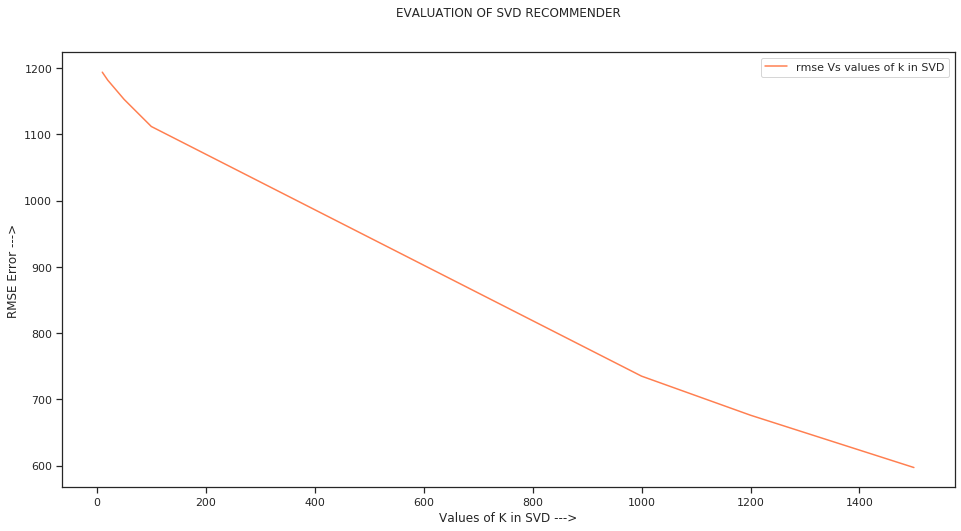

In [204]:
################################################################
############## Let us plot and see the SVD performance #########
################################################################

X_k = [10, 20, 50, 100, 1000, 1200, 1500]
Y_rmse = [1194, 1182, 1153, 1112, 735, 676, 597]

ax = sns.lineplot(x=X_k, y=Y_rmse, color="coral", label="rmse Vs values of k in SVD")
ax.set_xlabel('Values of K in SVD --->')
ax.set_ylabel('RMSE Error --->')
ax.set_title("EVALUATION OF SVD RECOMMENDER\n\n")

fig = plt.gcf()
fig.set_size_inches( 16, 8)
plt.show()

### Idea from evaluation is clear i.e., RMSE seem to drop significantly with higher values of K. 
i.e., 
1. At K=10, RMSE is around 1200
2. It kept dropping with increase in different values of K, and significant drop in RMSE was around 1000-1500
3. K can vary between 1 to 2000 for above dataset, i.e. we have chosen a subset of user * item matrix --> 2000 user * 45,000 items
4. Optimum value of K depends on the point where there is no much significant drop in RMSE. 
5. I am going to take K = 1500 as my optimum K for SVD recommender

In [106]:
###################################################################
#### Inspecting the svd ratings dataframe by user * item matrix ###
###################################################################
svd_ratings_df.head()

asin,0594451647,0594481813,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,1400599997,...,B00KSLCU72,B00KVNY2KA,B00KWHMR6G,B00KXAFYZS,B00KYMCJF8,B00L21HC7A,B00L2442H0,B00L26YDA4,B00L3YHF6O,B00LGQ6HL8
A100UD67AHFODS,0.041881,-0.009142,0.153817,-0.023662,0.011438,0.027323,-0.038450,-0.009186,-0.038340,0.004585,...,-0.021897,0.056114,0.001729,-0.004486,0.014583,0.000022,-0.038820,-0.032245,-0.038819,0.006076
A100WO06OQR8BQ,0.008024,0.005890,-0.091616,0.112143,0.051087,0.056567,-0.002791,0.095450,0.020966,0.011131,...,0.001933,0.025559,-0.014519,0.023400,0.015710,0.025517,-0.041967,0.022569,0.032655,-0.017000
A102RLOGIBBDMW,-0.004477,0.018656,0.071737,-0.011965,-0.020475,-0.010241,0.112841,1.234606,0.021518,0.036682,...,0.018590,0.053230,-0.001249,0.012241,0.058053,-0.004862,0.040280,0.058486,-0.003545,-0.007967
A10471FSILZ25C,-0.013382,-0.013789,0.015066,0.006646,0.018906,-0.001179,-0.019276,0.064566,-0.068650,-0.017130,...,-0.037981,0.009145,0.027045,-0.031970,0.021919,0.007892,-0.033223,0.040673,-0.021096,-0.014945
A105S56ODHGJEK,0.028270,0.004396,-0.096802,-0.037714,-0.089108,-0.096675,-0.005015,-0.124508,0.080970,0.300743,...,-0.000497,0.024321,0.048641,-0.004799,0.042614,0.077193,0.191062,0.061739,0.049751,0.036303


In [187]:
###############################################################################################
##### Small utility function that takes input of user ID, and number of items to predict ######
########### and uses SVD transformed predictions with minimal RMSE in evaluation ##############
#################### and predicts NEXT 'n' items based on his/her choice of items #############
###############################################################################################
def svd_get_user_recommendation(userID, n_items=5):
    user_already_purchased = list(ratings_meta_df.query('reviewerID == @userID').asin.unique())
    user_purchased_df = pd.DataFrame(svd_ratings_df.loc[userID])
    user_purchased_df.rename(columns = {userID:'ratings'}, inplace = True) 
    user_purchased_df = user_purchased_df.reset_index()
    next_recommended_items_asin = list(user_purchased_df.query('~asin.isin(@user_already_purchased)').sort_values(by='ratings',ascending=False).head(n_items).asin)

    next_recommendation=list(ratings_meta_df.query('asin.isin(@next_recommended_items_asin)')[["asin","title"]] \
                         .drop_duplicates().title)
    top_current_items_of_user = list(ratings_meta_df.query('asin.isin(@user_already_purchased)') \
                                     .sort_values(by='overall', ascending=False)[["title"]] \
                                     .drop_duplicates().head(10).title)
    
    return top_current_items_of_user, next_recommendation

### Let us test this recommendation on top consistent users : 

1. ADLVFFE4VBT8    A. Dent "Aragorn"                 427
2. A3OXHLG6DIBRW8  C. Hill "CFH"                     403
3. A6FIAB28IS79    Samuel Chell                      366
4. A680RUE1FDO8B   Jerry Saperstein                  352
5. A5JLAU2ARJ0BO   Gadgester "No Time, No Money"     351
6. A25C2M3QF9G7OQ  Comdet                            260


In [194]:
#################################################
##### RECOMMENDATION FOR USER A680RUE1FDO8B #####
#################################################
current_item, next_recommendation = svd_get_user_recommendation("A1ODOGXEYECQQ8")
print("################################################")
print("CURRENT ITEMS OF USER : \n")
print("################################################")
print(current_item)
print("################################################")
print("NEXT ITEMS TO RECOMMEND: \n")
print("################################################")
print(next_recommendation)
print("################################################")

################################################
CURRENT ITEMS OF USER : 

################################################
['Bushnell Powerview Compact Folding Roof Prism Binocular', 'PowerGen 2.4Amps / 12W Dual USB Car charger Designed for Apple and Android Devices - White', 'WD Elements 500 GB USB 2.0 Desktop External Hard Drive', 'Anker&reg; USB 3.0 Multi-in-1 Card Reader 4-Slots for SDXC, SDHC, SD, CF, High-Speed CF (UDMA), MS, M2, Micro SDXC, Micro SDHC, Micro SD Cards [Support UHS-I Cards]', 'eneloop SEC-CSPACER4PK C Size Spacers for use with AA battery cells', 'Flip MinoHD Video Camera - Brushed Metal, 8 GB, 2 Hours (2nd Generation)', 'Acme Made Smart Laptop Sleeve, NetBook (Wet Black Antik)', nan, 'Dell Inspiron Zino HD Piano Black Desktop PC (Windows 7 Home Premium)', 'SanDisk Sansa Clip+ 2 GB MP3 Player (Black)']
################################################
NEXT ITEMS TO RECOMMEND: 

################################################
['Sennheiser HD201 Lightweight Over-Ear

### Verdict on this recommendation for user A1ODOGXEYECQQ8 :

This user seem to have car charger for android/apple devices, desktops, MP3 player, Camera USD and SD cards. AND OUR RECOMMENDATION engine has recommended camera case, headphones, keyboard case for Apple series and turbo charging adapters for apple/android device.

#### THIS SEEM PERFECT RECOMMENDATION TO ME, If I am that user, I would definitely start exploring these recommendations as I have related products with me. sure, why not?

In [196]:
#################################################
##### RECOMMENDATION FOR USER ADLVFFE4VBT8 #####
#################################################
current_item, next_recommendation = svd_get_user_recommendation("ADLVFFE4VBT8")
print("################################################")
print("CURRENT ITEMS OF USER : \n")
print("################################################")
print(current_item)
print("################################################")
print("NEXT ITEMS TO RECOMMEND: \n")
print("################################################")
print(next_recommendation)
print("################################################")

################################################
CURRENT ITEMS OF USER : 

################################################
['ViewSonic VX2250WM-LED 22-Inch (21.5-Inch Vis) Widescreen Full HD 1080p LED Monitor with Integrated Stereo Speakers', 'Logitech M570  Wireless Trackball', '(30 Pack) MagicFiber&reg; Premium Microfiber Cleaning Cloths - For Tablet, Cell Phone, Laptop, LCD TV Screens and Any Other Delicate Surface (29 Black, 1 Grey)', 'Kingston Digital 8GB DataTraveler 101 G2 USB 2.0 Drive - Red (DT101G2/8GBZET)', 'MOTOROLA XOOM Android Tablet (10.1-Inch, 32GB, Wi-Fi)', 'Sanyo NEW eneloop 1000 Super Power Pack with 12 AA, 4 AAA, 2 C and D Spacers, 4 Position Charger and Storage Case (Discontinued by Manufacturer)', 'Belkin Micra Digital High-Speed HDMI Cable (6ft)', 'SanDisk 16GB Cruzer Micro USB 2.0 Drive SDCZ6-016G-A11 (Refurbished)', 'Micra Digital CAT5e Snagless Patch Cable, 5 Feet (Black)', 'Micra Digital USB A to USB B Cable (6 Feet)']
#######################################

### Verdict on this recommendation for user ADLVFFE4VBT8 :

This user seem to have microfiber cloth for LCD screens, LED monitors with Integrated audio, Tablets, HDMI cables, USBs and some cable wires. OUR RECOMMENDATION ENGINE has recommended various screen protectors, bluetooth USB adapter for desktops, HDTV and Audio system.

#### This is INTERESTING, if user has integrated audio LED monitor ---> RECOMMENDING AUDIO perfectly makes sense. This recommendation is also seeming VERY RELEVANT per user choice.

In [197]:
#################################################
##### RECOMMENDATION FOR USER A6FIAB28IS79 #####
#################################################
current_item, next_recommendation = svd_get_user_recommendation("A6FIAB28IS79")
print("################################################")
print("CURRENT ITEMS OF USER : \n")
print("################################################")
print(current_item)
print("################################################")
print("NEXT ITEMS TO RECOMMEND: \n")
print("################################################")
print(next_recommendation)
print("################################################")

################################################
CURRENT ITEMS OF USER : 

################################################
['RCA RC5220P DVD Player', 'Apple TV MC572LL/A (2nd Generation) (Old Version)', 'Apple MacBook Pro MD101LL/A 13.3-Inch Laptop', 'Click n Dig Key Finder Wireless RF Item Locator Remote Control, Pet, Wallet, Keyfinder-Free Extra Batteries', 'Apple iPod touch 8 GB (2nd Generation) (Discontinued by Manufacturer)', 'Kindle Fire HD 7&quot;, Dolby Audio, Dual-Band Wi-Fi, 16 GB', 'Apple iPod touch 8 GB Black (4th Generation) (Discontinued by Manufacturer)', 'Apple iPod classic 120 GB Black (6th Generation)  (Discontinued by Manufacturer)', 'Belkin 2-Pack Silicone Sleeve Case for iPod touch 2G, 3G (Black/White)', 'Apple MacBook Air MD711LL/A 11.6-Inch Laptop (OLD VERSION)']
################################################
NEXT ITEMS TO RECOMMEND: 

################################################
['Monster THX V100 CV-4 THX Certified Component Video Cables (4 feet)', 'Micr

### Verdict on this recommendation for user A6FIAB28IS79 :

This suer seem to have lot of devices - Macbooks, Ipods, Kindle tablet, DVD player, Apple TV. Our RECOMMENDATION ENGINE is recommending relevant accessories of those devices like cables, mouse, screenprotector for dveices, RAMs for laptops. 

#### Again, as a user I would definitely be happy with this recommendation as I have lot of devices and these accessories might be the ones I would be interested to purchase. VERY RELEVANT recommendation!

### FINAL VERDICT

#### Technical Summary:

In this small project, we have explored various recommendation techniques based on both user and item characteristics. We have obtained interesting recommendations in every technique we explored - Content based, Popularity based, Memory based collaborative techniques, Model based collaborative techniques. 

Out of all, SVD (matrix factorization) seemed very interesting and promising for recommending items based on user's choice and characteristics. 

#### Functional Summary:
For new users, we could use popularity based recommendations like 'Trending in new arrivals' or 'Popularly trending' along with content based recommendations + For regular users, we could definitely leverage recommendations from SVD/Matrix factorization techniques. Overall, we could definitely design a hybrid recommendation engine to give better user experience in getting interesting recommendation of items  

### What we could have done? Future Scope to keep adding to this project :

1. Additional feature engineering techniques like extracting weight to feature based on year of ratings, to bring more realistic recommendation for seasonal items. These would definitely be useful while calculating similarity scores.
2. In Content based recommendation, we have used only title of product in this project scope. We could use additional details like helpful percentage of review, negative reviews, positive reviews from review description like grouping multiple negative rated products together & recommending positively trending product with closer similarity score. These would bring real value of user interface in product exploring options in .COM field like amazon.
3. We only used ONLY one subset of data from entire dataset, we could build several such small batches of recommendations based on category similarity score. These would definitely enhance to recommend better products from ONE family of product space. Like, apple products for apple fanatics or, fitness related products for users stressing more about fitness in their reviews etc.